# Machine Learning: AllLife Bank Personal Loan Campaign

## Problem Statement

### Context

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

### Objective

To predict whether a liability customer will buy personal loans, to understand which customer attributes are most significant in driving purchases, and identify which segment of customers to target more.

### Data Dictionary
* `ID`: Customer ID
* `Age`: Customer’s age in completed years
* `Experience`: #years of professional experience
* `Income`: Annual income of the customer (in thousand dollars)
* `ZIP Code`: Home Address ZIP code.
* `Family`: the Family size of the customer
* `CCAvg`: Average spending on credit cards per month (in thousand dollars)
* `Education`: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* `Mortgage`: Value of house mortgage if any. (in thousand dollars)
* `Personal_Loan`: Did this customer accept the personal loan offered in the last campaign? (0: No, 1: Yes)
* `Securities_Account`: Does the customer have securities account with the bank? (0: No, 1: Yes)
* `CD_Account`: Does the customer have a certificate of deposit (CD) account with the bank? (0: No, 1: Yes)
* `Online`: Do customers use internet banking facilities? (0: No, 1: Yes)
* `CreditCard`: Does the customer use a credit card issued by any other Bank (excluding All life Bank)? (0: No, 1: Yes)

### Index
* [EDA](#eda)
* [Data Preprocessing](#data_preprocessing)
* [Model Building](#model_building)
* [Default Decision Tree - model0](#dtree_default)
* [Pre-Pruned Decision Tree - model1](#dtree_prepruned)
* [Post-Pruned Decision Tree - model2](#dtree_postpruned)
* [Model Comparison and Final Model Selection](#final_model)
* [Actionable Insights and Business Recommendations](#recommendations)

## Importing necessary libraries

In [ ]:
# Installing the libraries with the specified version.
!pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 scikit-learn==1.2.2 sklearn-pandas==2.2.0 -q --user

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [ ]:
# to load and manipulate data
import pandas as pd
import numpy as np

# to visualize data
import matplotlib.pyplot as plt
import seaborn as sns

# to split data into training and test sets
from sklearn.model_selection import train_test_split

# to build decision tree model
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# to tune different models
from sklearn.model_selection import GridSearchCV

# to compute classification metrics
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    recall_score,
    precision_score,
    f1_score,
    make_scorer,
    classification_report
)

# To perform statistical analysis
import scipy.stats as stats

# Library to suppress warnings or deprecation notes
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# google drive mount
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Loading the dataset

In [ ]:
# load the dataset
loan=pd.read_csv('/content/drive/MyDrive/Loan_Modelling.csv')

In [ ]:
#create a copy of the dataset
data=loan.copy()

## Data Overview

* Observations
* Sanity checks

In [ ]:
#shape of the data
data.shape
print(f"The dataset has {data.shape[0]} rows and {data.shape[1]} columns")

The dataset has 5000 rows and 14 columns


In [ ]:
# checking data variables
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


* There are 14 columns and all are numerical.
* No missing values



In [ ]:
#checking for Null
data.isnull().sum()

,0
ID,0
Age,0
Experience,0
Income,0
ZIPCode,0
Family,0
CCAvg,0
Education,0
Mortgage,0
Personal_Loan,0


* There are no missing values

In [ ]:
#checking for duplicates
data.duplicated().sum()

0

* There are no duplicate rows

In [ ]:
#checking the sample from the data
data.sample(10)

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
177,178,29,3,65,94132,4,1.8,2,244,0,0,0,0,0
841,842,57,33,121,94542,1,4.3,1,0,0,1,0,0,0
371,372,58,34,19,92029,4,0.7,1,0,0,0,0,0,0
4212,4213,50,23,9,94109,1,0.5,2,98,0,0,0,1,0
4105,4106,39,15,139,91801,1,3.4,1,353,0,0,0,1,0
1076,1077,40,13,24,94608,3,1.0,2,0,0,0,0,1,0
3290,3291,52,27,113,92038,1,0.1,3,0,0,0,0,0,0
4431,4432,38,12,60,92806,2,1.8,1,0,0,0,0,1,0
644,645,52,27,33,92121,2,2.0,2,0,0,0,0,1,0
2221,2222,59,33,73,92056,2,1.7,3,0,0,0,0,1,1


* ID column looks like a unique identifier.
* Personal_Loan, Securities_Account, CD_Account, Online and CreditCard are numerical datatype but are categorical in nature.

In [ ]:
# checking unique values in ID column
data.ID.nunique()

5000

**Treating ID**
* **ID column has unique customer ID , so it can be dropped.**

In [ ]:
#drop the ID column
data.drop('ID',axis=1,inplace=True)

In [ ]:
# checking data summary
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.0,20.0,30.0,43.0
Income,5000.0,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0
ZIPCode,5000.0,93169.257000,1759.455086,90005.0,91911.0,93437.0,94608.0,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.0,2.0,3.0,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.7,1.5,2.5,10.0
Education,5000.0,1.881000,0.839869,1.0,1.0,2.0,3.0,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.0,0.0,101.0,635.0
Personal_Loan,5000.0,0.096000,0.294621,0.0,0.0,0.0,0.0,1.0
Securities_Account,5000.0,0.104400,0.305809,0.0,0.0,0.0,0.0,1.0


**Observations from data summary**

| **Feature**           | **Observation**                                                                                           |
|-----------------------|-----------------------------------------------------------------------------------------------------------|
| **Age**               | Average age is 45, with a minimum of 23 and max of 67.                                                    |
| **Experience**        | Average experience is 20 years; max is 43 years. **Minimum experience is -3, which is odd and needs checking.** |
| **Income**            | **Income (in thousands) ranges from 8 to 224, with an average of 73.**                                    |
| **Family**            | Family members range from 1 to 4.                                                                         |
| **Credit Card**       | **Credit Card Spending (in thousands) varies from 0 to 10, with an average spend of ~2.**                |
| **Education Level**   | **Education level varies from Undergrad (1) to Advanced/Professional (3); average education level is Graduate (1.88).** |
| **Mortgage**          | **Mortgage (in thousands) varies from 0 to 635, with an average mortgage amount of 56.4.**               |
| **Personal Loan**     | **Some users accepted personal loan offers in the last campaign.**                                       |
| **Securities Account**| Some users have securities accounts too.                                                                 |
| **CD Account**        | Some users have CD accounts.                                                                             |
| **Online**            | Most users use internet banking facilities, though some do not.                                          |
| **Credit Card**       | **Few customers have accepted credit card offers from other banks.**                                     |


**Checking skew in the data**

In [ ]:
#checking skew in the data
data.skew()

,0
Age,-0.029341
Experience,-0.026325
Income,0.841339
ZIPCode,-0.296165
Family,0.155221
CCAvg,1.598443
Education,0.227093
Mortgage,2.104002
Personal_Loan,2.743607
Securities_Account,2.588268


* Right skewed - Income, CCAvg & Mortgage


#### Data Preprocessing

**Reviewing negative Work Experience**<br>
Since there were a few customers with negative work experience, let's review that.

In [ ]:
# check the data where experience is negative
print(data[data["Experience"] < 0]['Experience'].value_counts())

#random check the rows with negative experience
data[data["Experience"] < 0].sample(10,random_state=5)

Experience
-1    33
-2    15
-3     4
Name: count, dtype: int64


,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
3284,25,-1,101,95819,4,2.10,3,0,0,0,0,0,1
2980,25,-1,53,94305,3,2.40,2,0,0,0,0,0,0
4116,24,-2,135,90065,2,7.20,1,0,0,0,0,1,0
1905,25,-1,112,92507,2,2.00,1,241,0,0,0,1,0
3130,23,-2,82,92152,2,1.80,2,0,0,1,0,0,1
2430,23,-1,73,92120,4,2.60,1,0,0,0,0,1,0
540,25,-1,109,94010,4,2.30,3,314,0,0,0,1,0
3279,26,-1,44,94901,1,2.00,2,0,0,0,0,0,0
315,24,-2,51,90630,3,0.30,3,0,0,0,0,1,0
451,28,-2,48,94132,2,1.75,3,89,0,0,0,1,0


* There are total **52 rows with Experience as -1, -2 and -3**. We can impute this  with **absolute values**.

**Impute negative Experience with absolute values**

In [ ]:
# impute negative experience with absolute values
data["Experience"].replace(-1, 1, inplace=True)
data["Experience"].replace(-2, 2, inplace=True)
data["Experience"].replace(-3, 3, inplace=True)

<a name="eda"></a>
## Exploratory Data Analysis.

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. [What is the distribution of mortgage attribute? Are there any noticeable patterns or outliers in the distribution?](#mortgage)
2. [How many customers have credit cards?](#credit_card)
3. [What are the attributes that have a strong correlation with the target attribute (personal loan)?](#correlation)
4. [How does a customer's interest in purchasing a loan vary with their age?](#age)
5. [How does a customer's interest in purchasing a loan vary with their education?](#education)

## Univariate Analysis

Creating functions for plots

**Function to Plot Boxplot and Histogram**

In [ ]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    ax_box2.set_title(f'Boxplot of {feature}') #set title for boxplot
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram
    ax_hist2.set_title(f'Histogram of {feature}') #set title for histogram


**Function to create labeled Barplot**

In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage
    plt.title(f"Labeled Barplot of {feature}")

    plt.show()  # show the plot

### Age

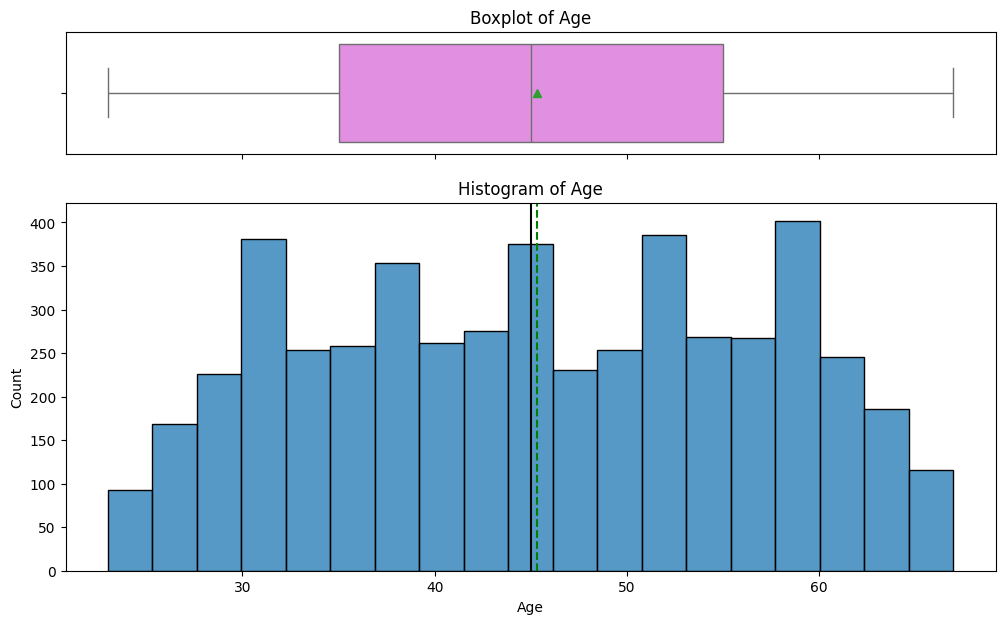

In [ ]:
# plot histogram and boxplot for age
histogram_boxplot(data, "Age")

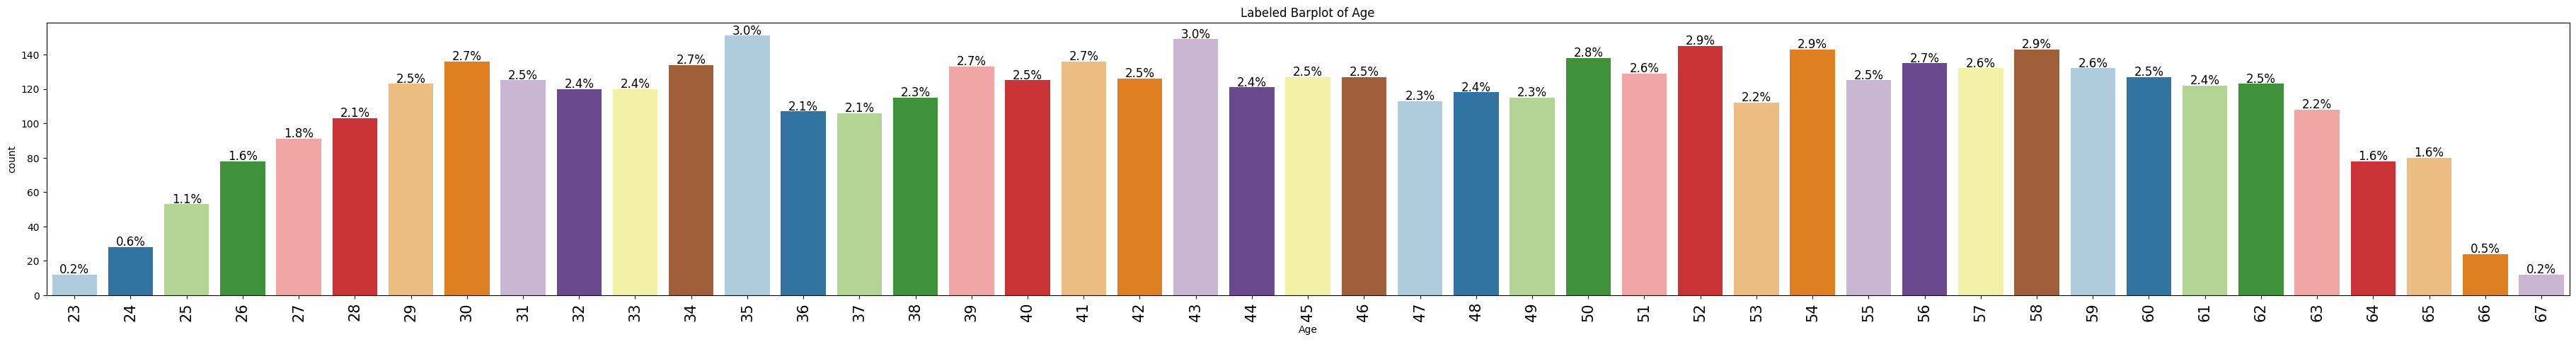

In [ ]:
labeled_barplot(data, "Age", perc=True)

* **Age distribution is normal and average age is around 45.**



### Experience

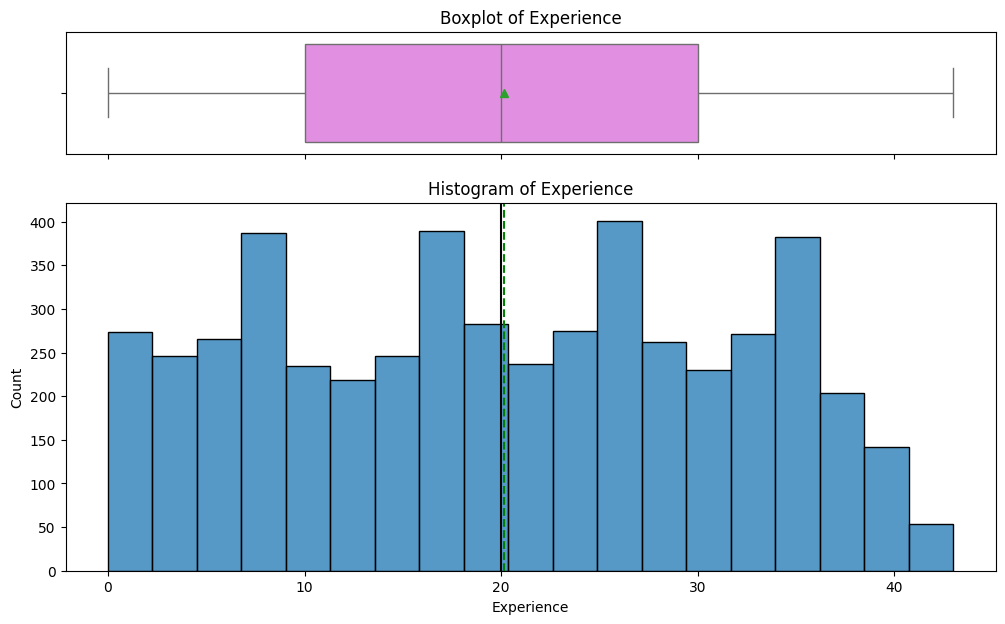

In [ ]:
# plot histogram and boxplot for Experience
histogram_boxplot(data, "Experience")

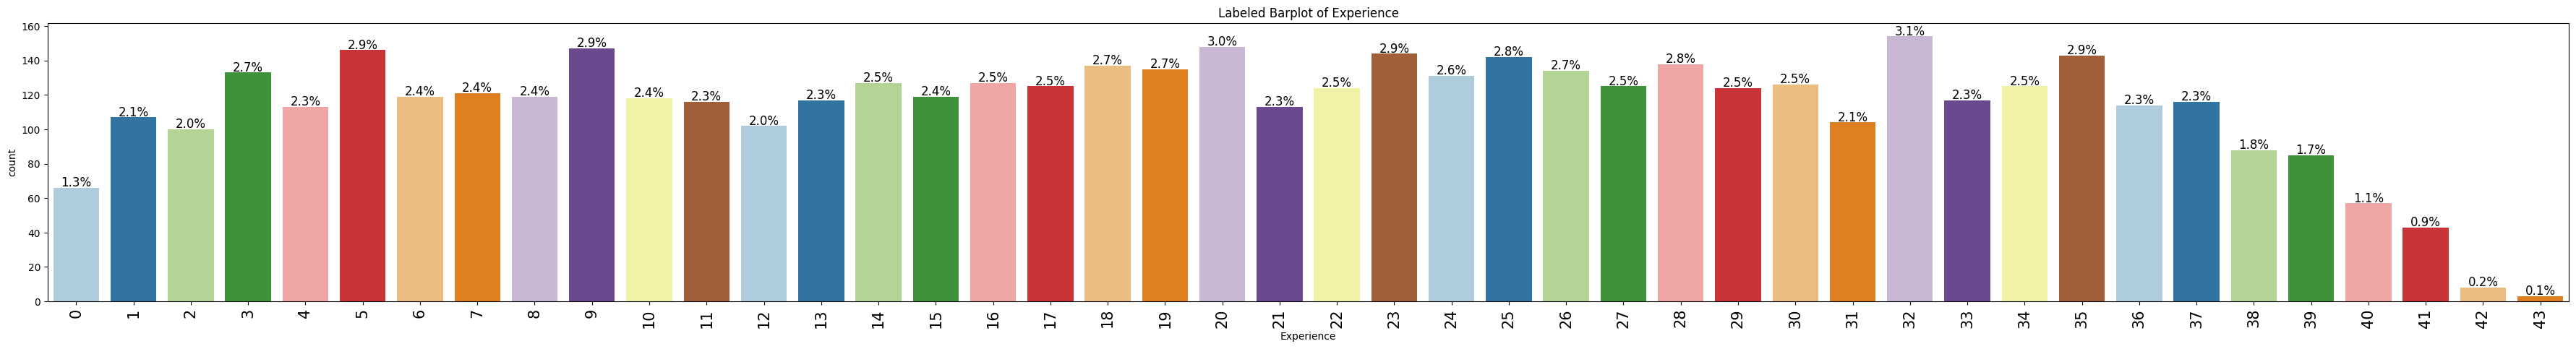

In [ ]:
labeled_barplot(data, "Experience", perc=True)

* Experience has a normal distribution.
* Average Experience is around 20 years.

### Income

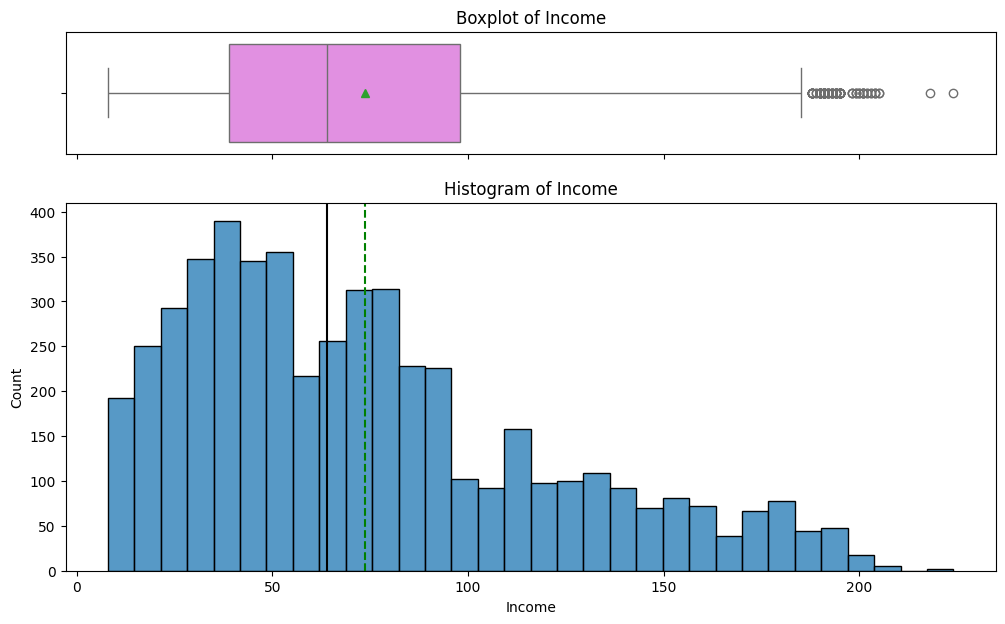

In [ ]:
# plot histogram and boxplot for Income
histogram_boxplot(data, "Income")

In [ ]:
# check average income
data.Income.mean()

73.7742

* Income is right-skewed and there are outliers.
* Average Income is around 73 (in thousands).

### Family

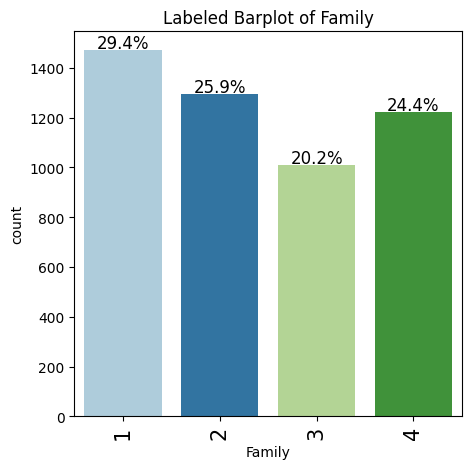

In [ ]:
#create labeled barplot for Family
labeled_barplot(data, "Family", perc=True)

In [ ]:
#check family members
data.Family.value_counts(normalize=True).round(2)

,proportion
Family,
1,0.29
2,0.26
4,0.24
3,0.20


* Approximately 30% have 1 Family member, followed by 2,4 and 3 family members.

### Zipcode

In [ ]:
#check unique zipcode
data.ZIPCode.nunique()

467

* There are 467 unique zipcode

For our analysis, let us check the Cities for these ZipCode. We will use `uszipcode` library to get the city.

In [ ]:
#install sqlalchemy-mate and uszipcode for analysis of Zipcode
!pip install sqlalchemy-mate==2.0.0.0
!pip install --upgrade uszipcode

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.0/57.0 kB 2.4 MB/s eta 0:00:00
  Created wheel for atomicwrites: filename=atomicwrites-1.4.1-py2.py3-none-any.whl size=6940 sha256=06bcd7a79bcd901589f720947b6583ea03f678fafd5cf39cdb695f4b753b105e
  Stored in directory: /root/.cache/pip/wheels/34/07/0b/33b15f68736109f72ea0bb2499521d87312b932620737447a2
Successfully built atomicwrites


#### Data Preprocessing - Create City
Creating a new column City for zipcodes

In [ ]:
import sqlalchemy_mate #required for uszipcode

from uszipcode import SearchEngine #required to search city for Zipcode
search = SearchEngine()

# Define a function to get the city name from a ZIP code
def get_city(zipcode):
    zipcode_info = search.by_zipcode(zipcode)
    return zipcode_info.major_city if zipcode_info else None

# Apply the function to the 'ZIPCode' column to create a new 'City' column
data['City'] = data['ZIPCode'].apply(get_city)

Download /root/.uszipcode/simple_db.sqlite from https://github.com/MacHu-GWU/uszipcode-project/releases/download/1.0.1.db/simple_db.sqlite ...
  1.00 MB downloaded ...
  2.00 MB downloaded ...
  3.00 MB downloaded ...
  4.00 MB downloaded ...
  5.00 MB downloaded ...
  6.00 MB downloaded ...
  7.00 MB downloaded ...
  8.00 MB downloaded ...
  9.00 MB downloaded ...
  10.00 MB downloaded ...
  11.00 MB downloaded ...
  Complete!


In [ ]:
#check number of unique cities
data.City.nunique()

244

In [ ]:
# top 10 cities for home
data.City.value_counts().head(10)

,count
City,
Los Angeles,375
San Diego,269
San Francisco,257
Berkeley,241
Sacramento,148
Palo Alto,130
Stanford,127
Davis,121
La Jolla,112


* There are 244 unique cities.
* Most customer homes are in Los Angeles, followed by San Diego, San Francisco, Berkeley and Sacramento.

**Drop ZIPCode column**<br>
let's drop the ZIPCode column as we now have City Column.

In [ ]:
#drop the Zipcode column
data.drop('ZIPCode',axis=1,inplace=True)

### CCAvg

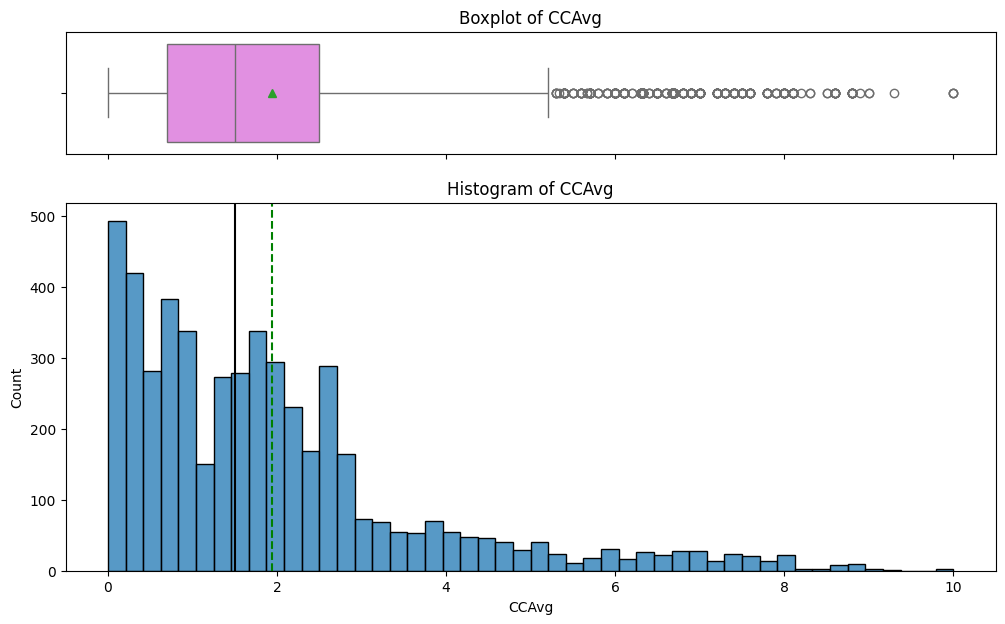

In [ ]:
#Check monthly average spending on Credit Card
histogram_boxplot(data, "CCAvg")

* CCAvg is heavily right-skewed with a lot of outliers.
* Average monthly spend on credit cards is around 2k.

### Education

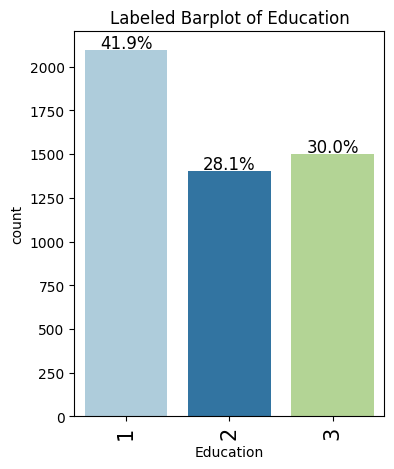

In [ ]:
#barplot for Education
labeled_barplot(data, "Education", perc=True)

* ~42% of customers have Undergrad(1)
* 28% for Graduate (2)
* 30% for Advanced,Professional (3)

### Mortgage

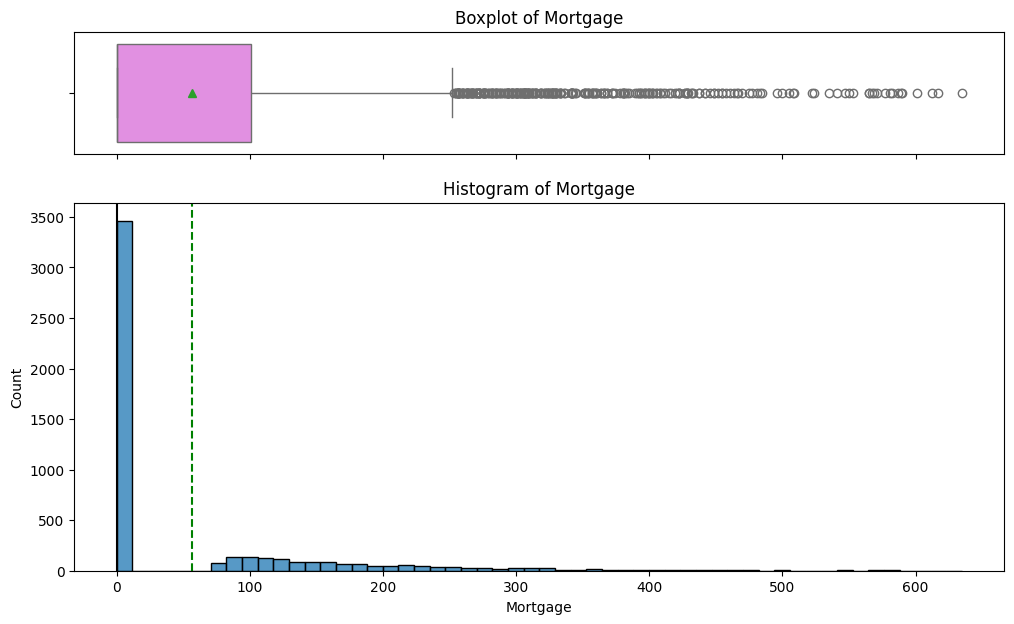

In [ ]:
## plot histogram and boxplot for Mortgage
histogram_boxplot(data, "Mortgage")

In [ ]:
#checking mortgage count
data.Mortgage.value_counts().head(5)

,count
Mortgage,
0,3462
98,17
119,16
89,16
91,16


Checking outliers for Mortgage

In [ ]:
# to find the 25th percentile and 75th percentile for Mortgage column.
mortgage_Q1 = data['Mortgage'].quantile(0.25)
mortgage_Q3 = data['Mortgage'].quantile(0.75)

mortgage_IQR = mortgage_Q3 - mortgage_Q1                   #Inter Quantile Range (75th percentile - 25th percentile)

mortgage_lower_whisker = mortgage_Q1 - 1.5*mortgage_IQR    #Finding lower and upper bounds for all values. All values outside these bounds are outliers
mortgage_upper_whisker = mortgage_Q3 + 1.5*mortgage_IQR

# percentage of outliers in Mortgage column
((data['Mortgage'] < mortgage_lower_whisker) | (data['Mortgage'] > mortgage_upper_whisker)).sum()/data.shape[0]*100

5.82

<a name="mortgage"></a>
#### **What is the distribution of mortgage attribute? Are there any noticeable patterns or outliers in the distribution?**
* Mortgage is heavily right-skewed and there are a lot of outliers.
* There are approximately 5.82% of outliers in the Mortgage column.
* There are 3462 customers with 0 in mortgage.
* A few home have close to 600k in mortgage.

### Securities Account

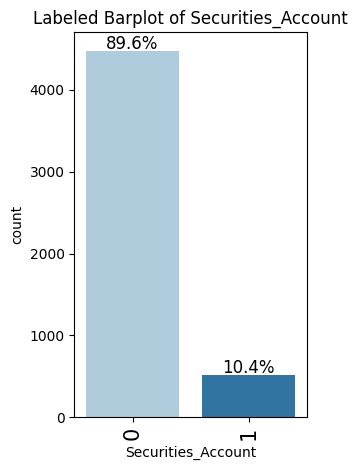

In [ ]:
# check Securities Account
labeled_barplot(data, "Securities_Account", perc=True)

* Approximately 90% don't have a Securities Account.

### CD_Account

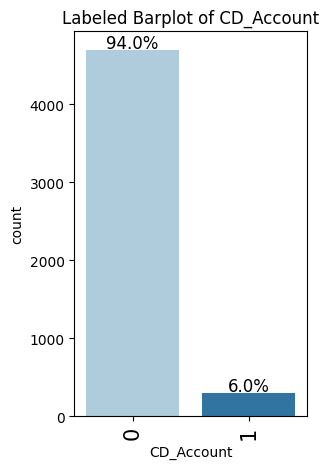

In [ ]:
#check CD Account
labeled_barplot(data, "CD_Account", perc=True)

* 94% don't have a CD account.

### Personal Loan

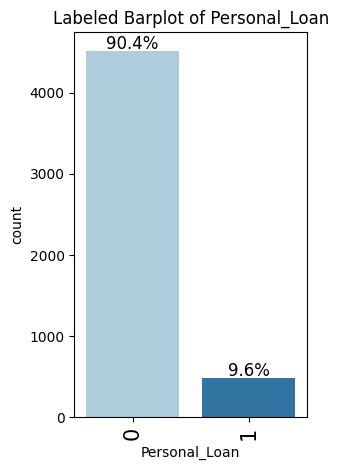

In [ ]:
#labeled barplot for Personal Loan
labeled_barplot(data, "Personal_Loan", perc=True)

In [ ]:
# customer who accepted personal loan offer in last campaign
data.Personal_Loan.value_counts()

,count
Personal_Loan,
0,4520
1,480


* 90.4% of customers did not accept Personal Loan.
* **480 customers accepted the personal loan offer in the last campaign.**
* **Conversion rate is 9% i.e. the customers accepted the personal loan offer.** This conversion rate matches with problem statment.

### Online

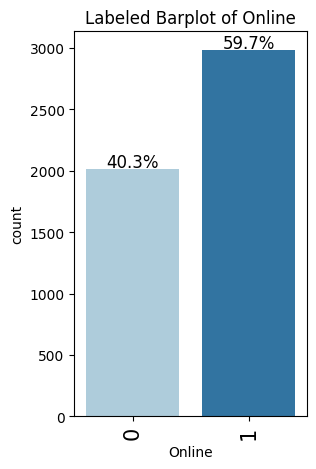

In [ ]:
#Check Online Usage
labeled_barplot(data, "Online", perc=True)

* Approximately 60% of customers use Internet Banking facilities.

### CreditCard

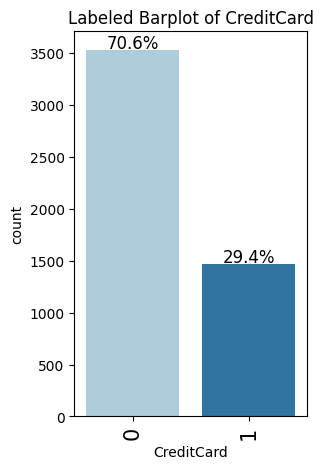

In [ ]:
#check credit card
labeled_barplot(data, "CreditCard", perc=True)

* Approximately 70% of customers have credit cards from other banks.

In [ ]:
# customers who have credit cards
data.CreditCard.value_counts()

,count
CreditCard,
0,3530
1,1470


<a name="credit_card"></a>
#### **How many customers have credit cards?**
* **1470 customers have credit cards issued by other banks.**



## BiVariate Analysis

Create functions for bivariate analysis

**Create function to plot stacked barplot**

In [ ]:
#function to plot stacked barplot
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

**Create function to plot distribution with respect to target**

In [ ]:
### function to plot distributions wrt target

def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title(f"Distribution of {predictor} for {target}=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title(f"Distribution of {predictor} for {target}=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title(f"Boxplot w.r.t {target}")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title(f"Boxplot (without outliers) w.r.t {target}")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

### Heatmap

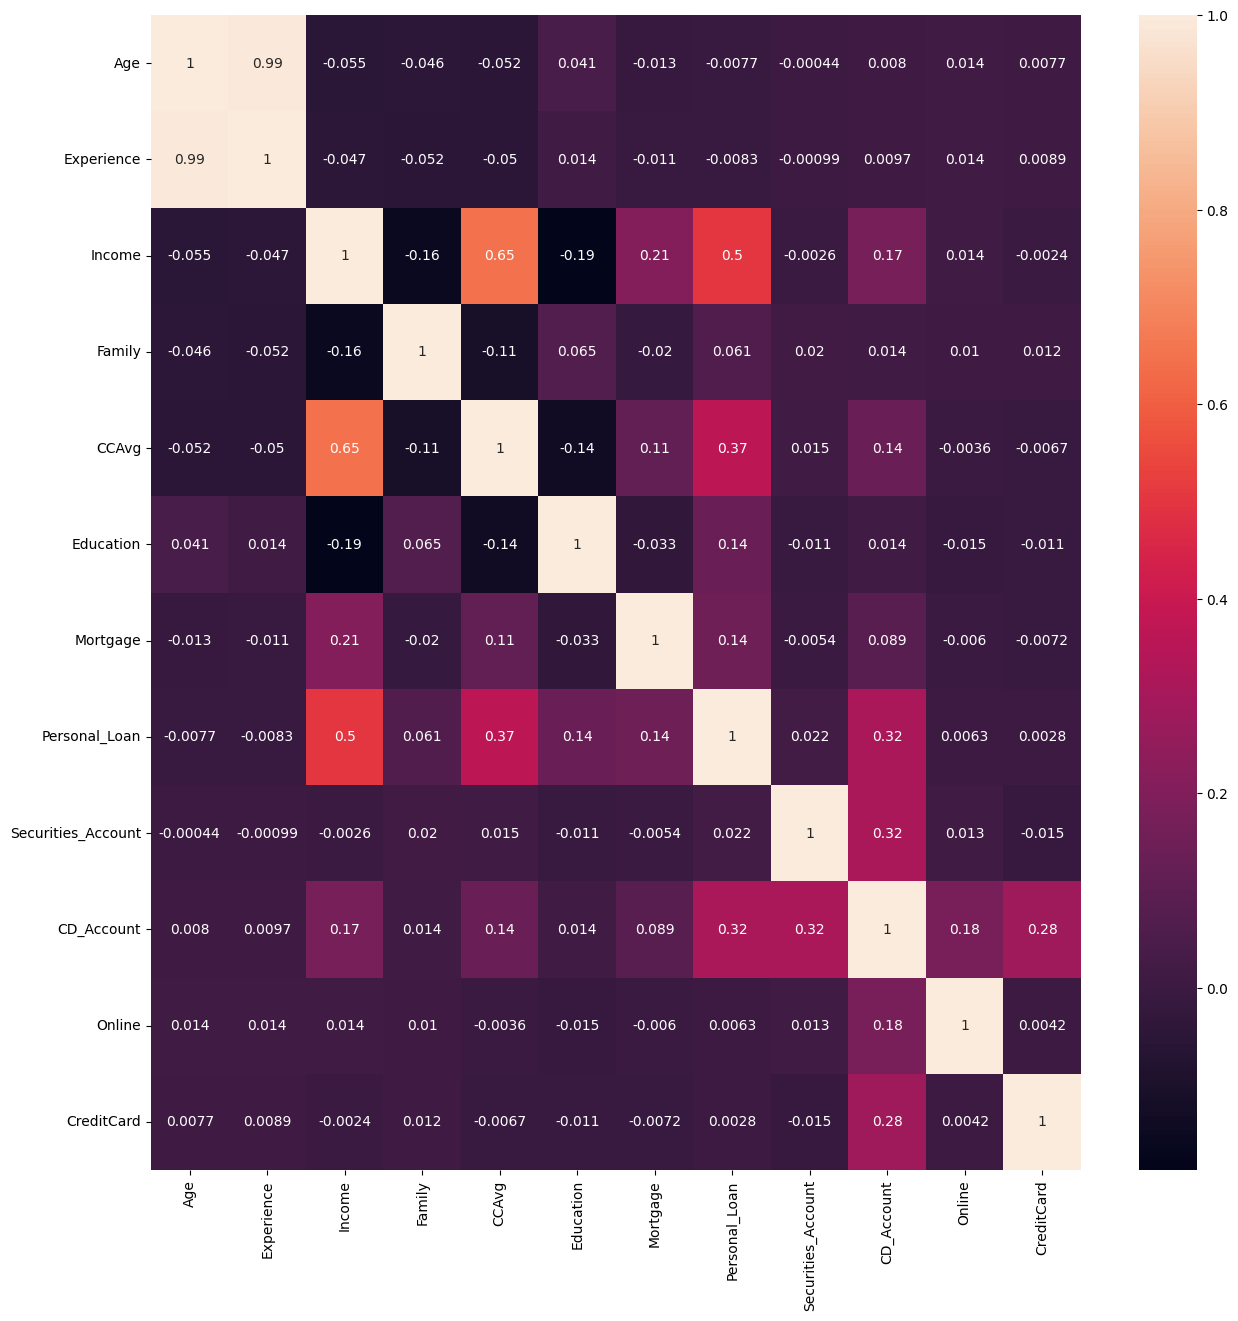

In [ ]:
#create heatmap
cols=['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education',
       'Mortgage', 'Personal_Loan', 'Securities_Account', 'CD_Account',
       'Online', 'CreditCard']

fig, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(data[cols].corr(), annot=True);

* **Age & Experience have high corrleation of 0.99**
* CCAvg and Income have correlation of 0.65
* Personal Loan and Income have correlation of 0.5

### Age Vs Personal Loan

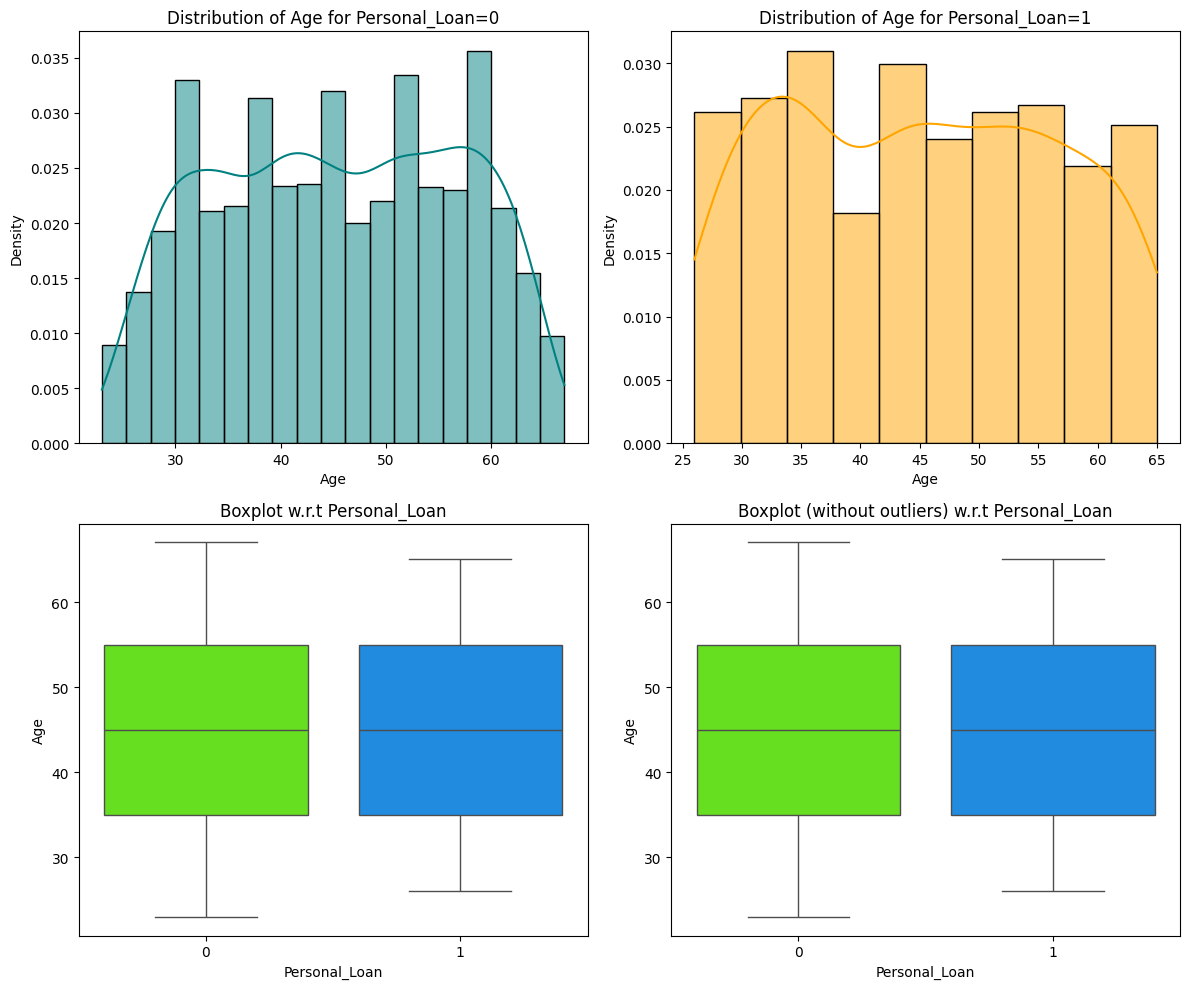

In [ ]:
# Age vs Personal Loan
distribution_plot_wrt_target(data, "Age", "Personal_Loan")

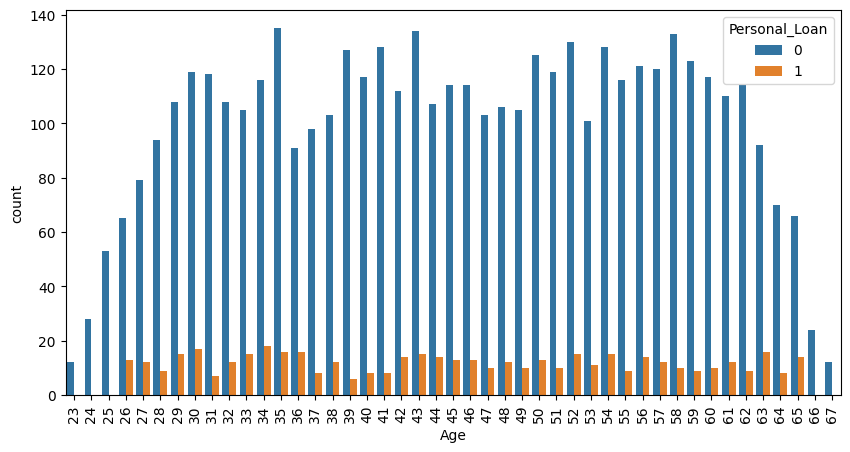

In [ ]:
#create countplot
plt.figure(figsize=(10, 5))
sns.countplot(data=data, x="Age", hue="Personal_Loan");
plt.xticks(rotation=90);

* Age has a normal distribution for both classes of Personal Loan.
* Except ages of 23,24,25,66 and 67, most other age groups have accepted personal loans in the last campaign.

For better visualization, let's bin the age into age groups.

In [ ]:
#create copy of data for visualization purposes
data2=data.copy()

In [ ]:
#bin the age group in ranges of 10
age_bins = [20, 30, 40, 50, 60, 70]
age_labels=['20-30','30-40','40-50','50-60','60-70']

#Create a new column with binned data
data2['age_group'] = pd.cut(data2['Age'], bins=age_bins, labels=age_labels, right=False)

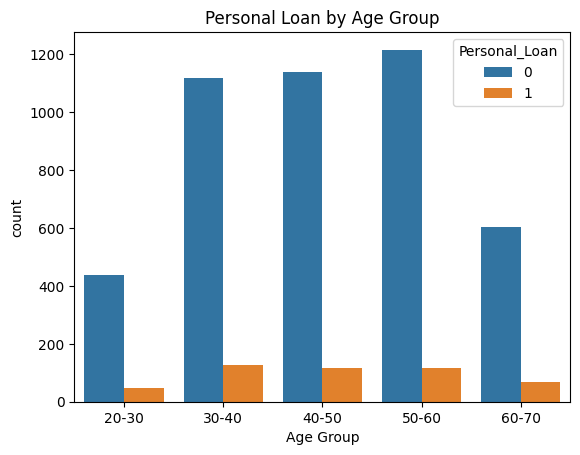

In [ ]:
#countplot age_group vs personal Loan
sns.countplot(data=data2, x="age_group", hue="Personal_Loan");
plt.xlabel("Age Group");
plt.title("Personal Loan by Age Group");

In [ ]:
#check Personal Loan by Age Group
data2.groupby('age_group')['Personal_Loan'].value_counts()

age_group  Personal_Loan
20-30      0                 439
           1                  49
30-40      0                1120
           1                 127
40-50      0                1140
           1                 117
50-60      0                1216
           1                 118
60-70      0                 605
           1                  69
Name: count, dtype: int64

In [ ]:
# check age group who accepted Personal Loan offer
data.query("Personal_Loan ==1").groupby("Age")['Personal_Loan'].count().nlargest(5)

,Personal_Loan
Age,
34,18
30,17
35,16
36,16
63,16


<a name="age"></a>
####**How does a customer's interest in purchasing a loan vary with their age?**
> * Age has a normal distribution for both classes of Personal Loan.
> * **Most of the offers were accepted by Age group of 30-40 (127 accepted) followed by 50-60 (118 accepted) & 40-50 (117 accepted).**

### Experience Vs Personal Loan

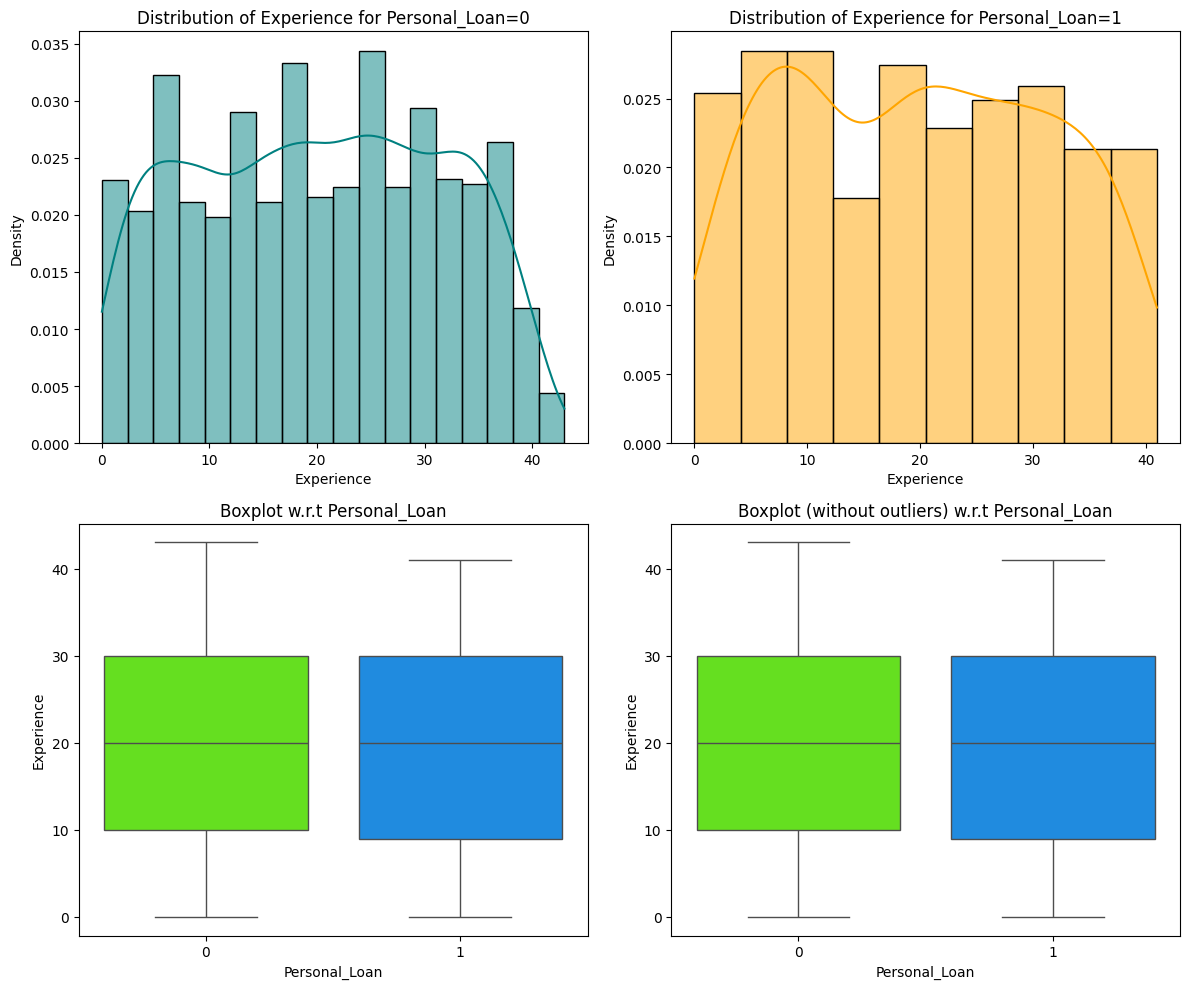

In [ ]:
#create plot of Experience Vs Personal Loan
distribution_plot_wrt_target(data, "Experience", "Personal_Loan")

In [ ]:
# check top 10 experience of users who accepted Personal Loan offer
data.query("Personal_Loan ==1").groupby("Experience")['Personal_Loan'].count().nlargest(10)

,Personal_Loan
Experience,
9,20
8,18
3,17
20,17
12,16
5,14
19,14
25,14
26,14


#### Observations for Experience Vs Personal Loan
* Experience has normal distrubtion for both classes of Personal Loan.
* Top 5 Personal Loan offers were accepted by customers with experience of 9 years(20), 8 years(18), 3 years(17), 20 years(17) and 12 years(16) .

### Education Vs Personal Loan

Personal_Loan     0    1   All
Education                     
All            4520  480  5000
3              1296  205  1501
2              1221  182  1403
1              2003   93  2096
------------------------------------------------------------------------------------------------------------------------


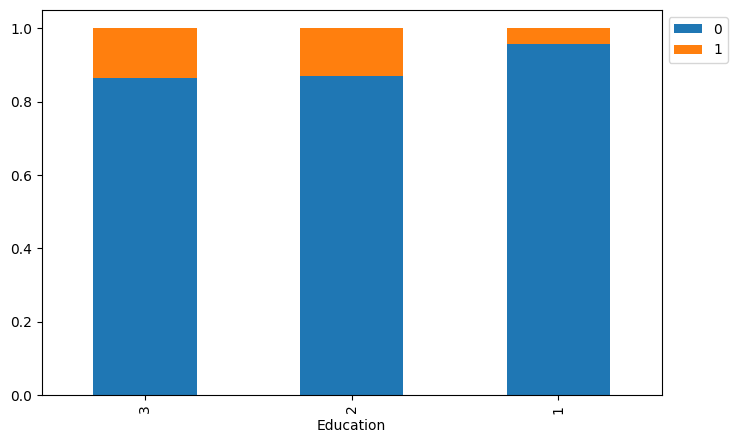

In [ ]:
#plot stacked barplot for Education Vs Personal Loan
stacked_barplot(data, "Education", "Personal_Loan")

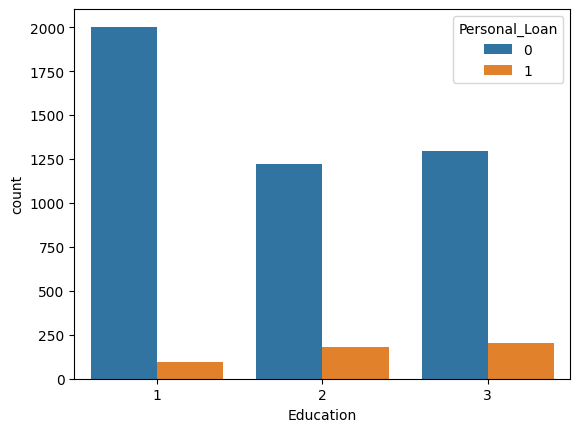

In [ ]:
sns.countplot(data=data, x="Education", hue="Personal_Loan");

In [ ]:
data.groupby('Education')['Personal_Loan'].value_counts(normalize=True)

Education  Personal_Loan
1          0                0.955630
           1                0.044370
2          0                0.870278
           1                0.129722
3          0                0.863424
           1                0.136576
Name: proportion, dtype: float64

<a name="education"></a>
#### **How does a customer's interest in purchasing a loan vary with their education?**

<a name="education"></a>
**Customers with Advanced/Professional Degree(3) have accepted the most Personal Loan Offers, followed by 2- Graduates and 1-Undergrad**
* 205 Personal Loans accepted by 3-Advanced/Professional Degree
* 182 Personal loans accepted by 2-Graduates
* 93 Personal loans accepted by 1- Undergrads<br>

**Conversion rate is similar for 3 & 2 (~13%) and .04% for 1.**


### Income Vs Personal Loan

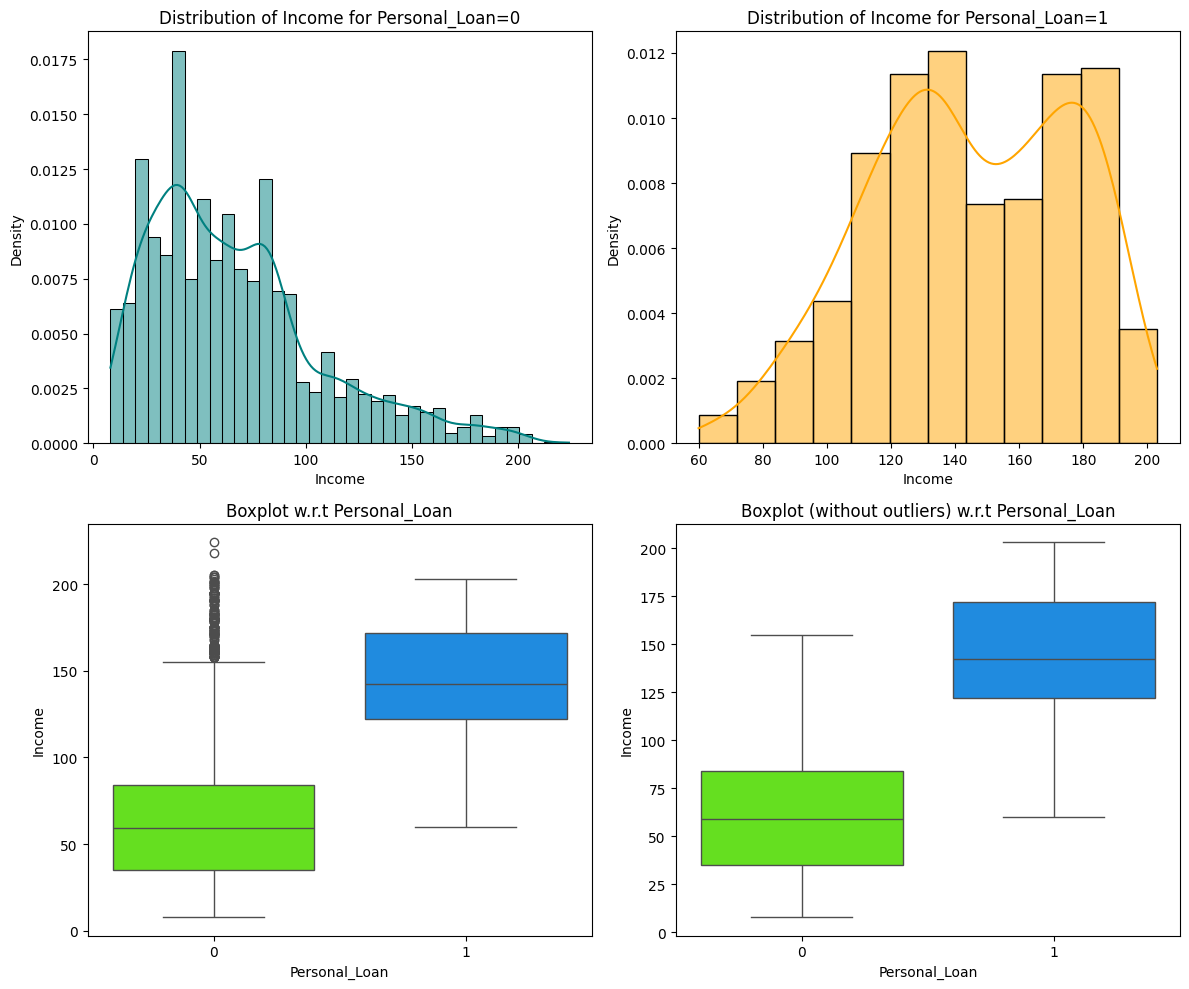

In [ ]:
#plot Income Vs Personal Loan
distribution_plot_wrt_target(data, "Income", "Personal_Loan")

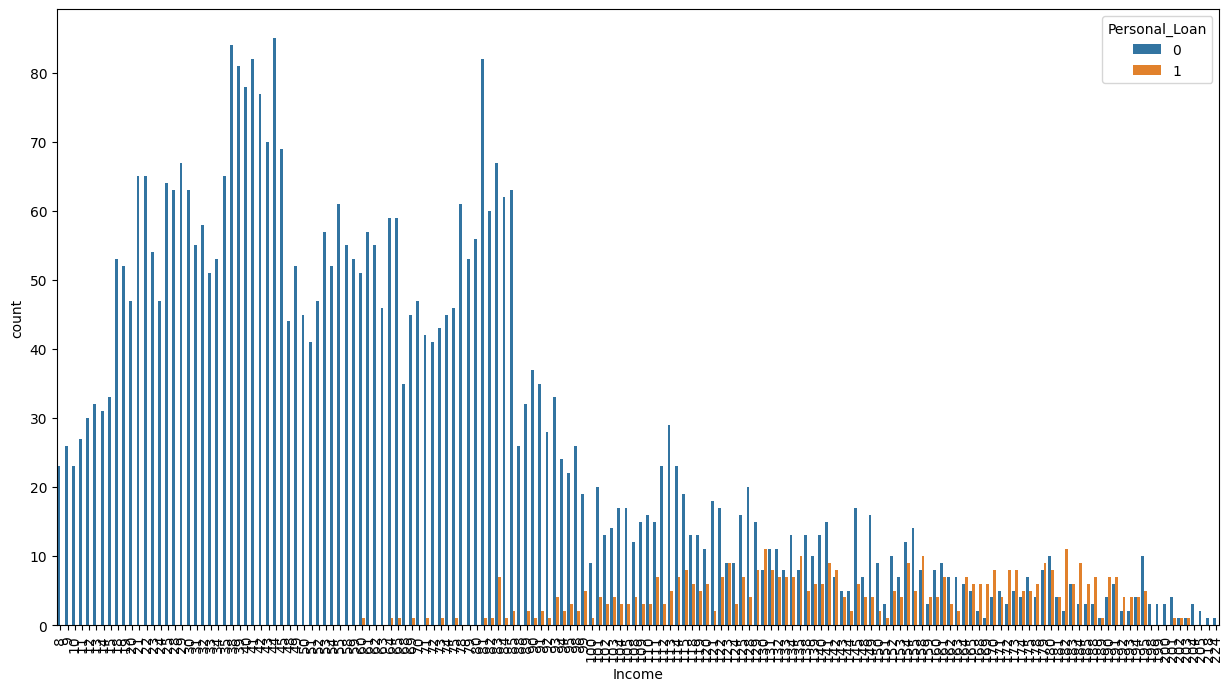

In [ ]:
#create countplot for Income vs Personal Loan
plt.figure(figsize=(15, 8))
sns.countplot(data=data, x="Income", hue="Personal_Loan");
plt.xticks(rotation=90);

**Creating Bins for Income**<br>
Let us create another plot to better visualize Income Vs Personal Loan

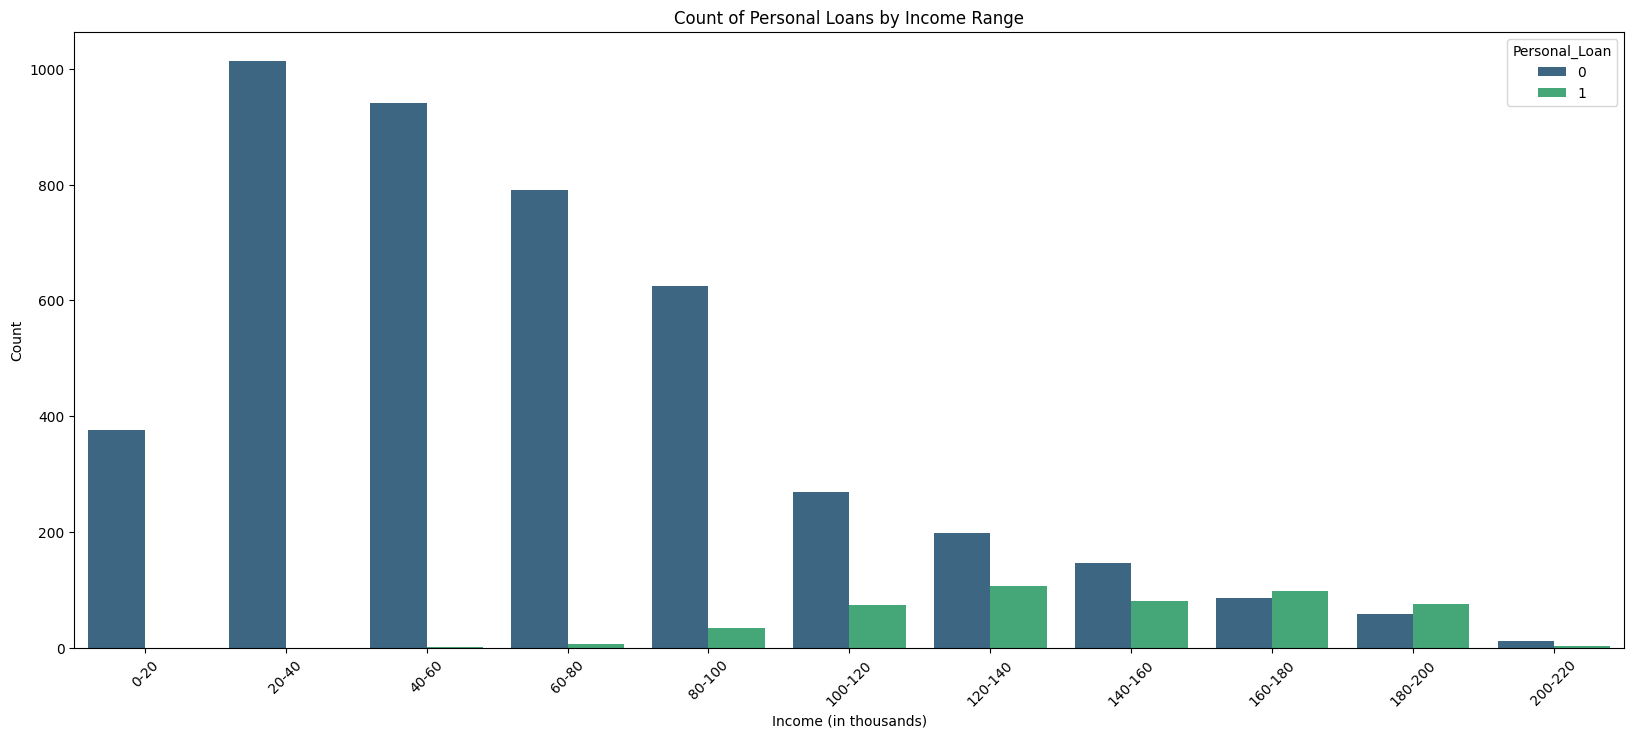

In [ ]:
# Define the bin edges
bins2 = range(0, int(data2['Income'].max()) + 10, 20)

# Create bin labels (optional)
bin_labels2 = [f'{i}-{i+20}' for i in bins2[:-1]]

# create the binned column
data2['Income_Range'] = pd.cut(data2['Income'], bins=bins2, labels=bin_labels2, include_lowest=True)

# Plotting the relationship between 'Income_Range' and 'Personal Loan'
plt.figure(figsize=(20, 8))
sns.countplot(x='Income_Range', hue='Personal_Loan', data=data2, palette='viridis')
plt.title('Count of Personal Loans by Income Range')
plt.xlabel('Income (in thousands)')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# top 10 Income for customers who accepted the Personal Loan offers
data2.query("Personal_Loan==1").groupby(['Income_Range'])['Personal_Loan'].count().nlargest(10)

,Personal_Loan
Income_Range,
120-140,107
160-180,98
140-160,81
180-200,75
100-120,74
80-100,35
60-80,6
200-220,3
40-60,1


#### Observations for Income Vs Personal Loan
* **As the income increases Personal Loan acceptance also increases then lowers at higher income ranges.**
* There are outliers but those don't have a very little impact on Personal Loan.
* Most Personal Loans were accepted by the customers in the salary range(in thousands) of: <br>
  1. **120-140** - 107
  2. **160-180** -98
  3. **140-160** -81

### City Vs Personal Loan

In [ ]:
#find top 10 cities
top_10_cities=data.City.value_counts().head(10).reset_index()['City']

# select top 10 cities for analysis
data3=data2[data2['City'].isin(top_10_cities)] #create a copy of data2 for analysis

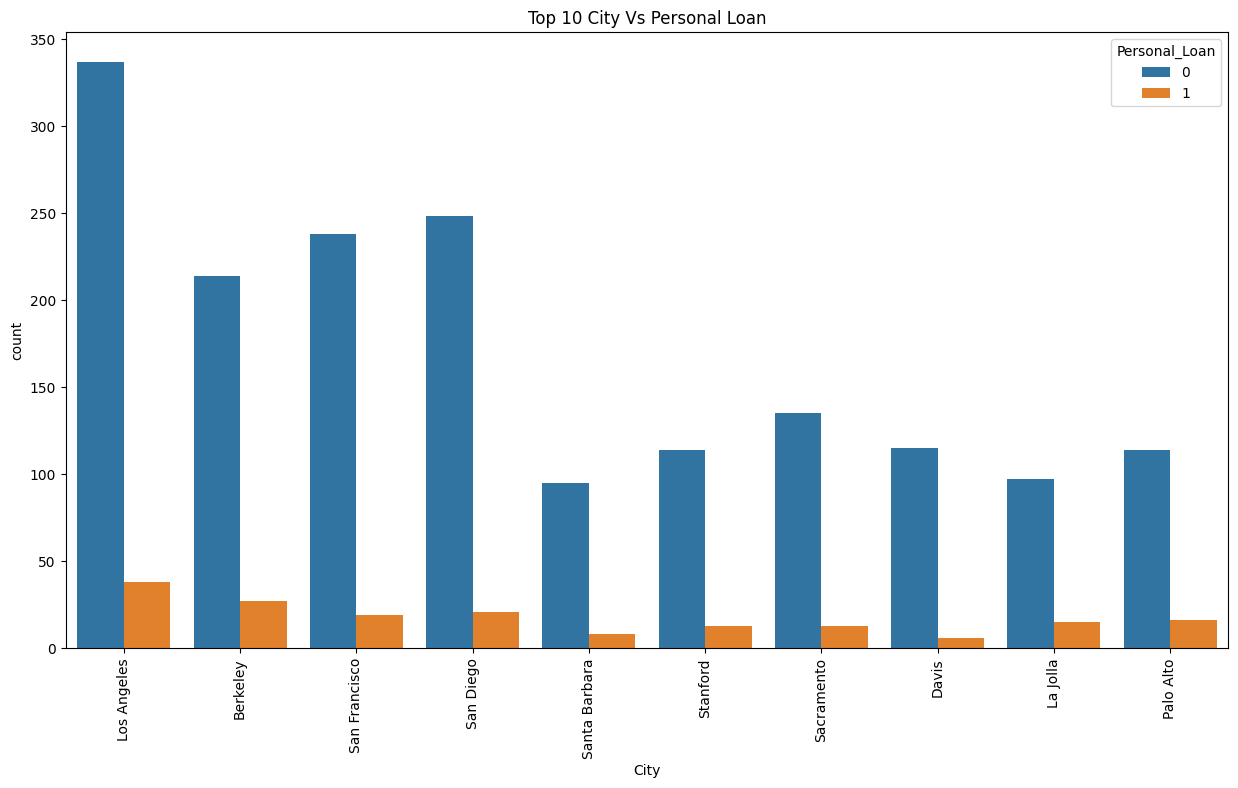

In [ ]:
#counplot for City vs Personal Loan
plt.figure(figsize=(15, 8))
sns.countplot(data=data3, x="City", hue="Personal_Loan");
plt.title("Top 10 City Vs Personal Loan")
plt.xticks(rotation=90);

In [ ]:
# top 10 cities for customers by home address
data2.query("Personal_Loan==1").groupby("City")['Personal_Loan'].count().nlargest(10)

,Personal_Loan
City,
Los Angeles,38
Berkeley,27
San Diego,21
San Francisco,19
Palo Alto,16
La Jolla,15
Sacramento,13
Stanford,13
Santa Clara,12


In [ ]:
#check convesion rate for city
data3.groupby("City")['Personal_Loan'].value_counts(normalize=True)

City           Personal_Loan
Berkeley       0                0.887967
               1                0.112033
Davis          0                0.950413
               1                0.049587
La Jolla       0                0.866071
               1                0.133929
Los Angeles    0                0.898667
               1                0.101333
Palo Alto      0                0.876923
               1                0.123077
Sacramento     0                0.912162
               1                0.087838
San Diego      0                0.921933
               1                0.078067
San Francisco  0                0.926070
               1                0.073930
Santa Barbara  0                0.922330
               1                0.077670
Stanford       0                0.897638
               1                0.102362
Name: proportion, dtype: float64

#### Observations for City Vs Personal Loan
* **Most personal loans were accepted by customers residing in Los Angeles, followed by Berkeley, San Diego, San Francisco and Palo Alto**
* Best conversion rates are for La Jolla, Palo Alto, Berkeley,Stanford and Los Angeles

| Location    | Conversion |
|-------------|------------|
| La Jolla    | 13%        |
| Palo Alto   | 12%        |
| Berkeley    | 11%        |
| Stanford    | 10%        |
| Los Angeles | 10%        |


### CCAvg vs Personal Loan

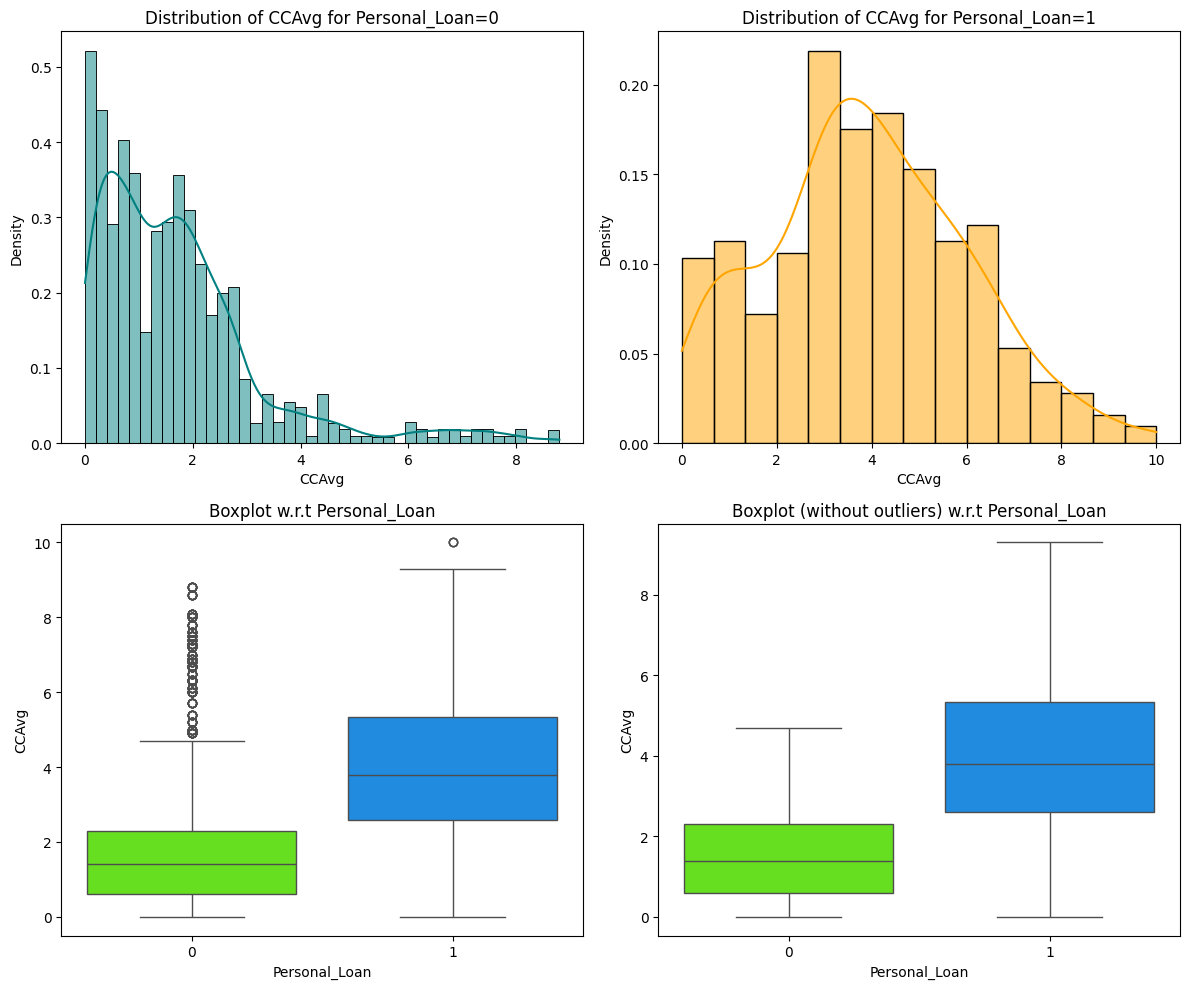

In [ ]:
#plot CCAvg vs Personal Loan
distribution_plot_wrt_target(data, "CCAvg", "Personal_Loan")

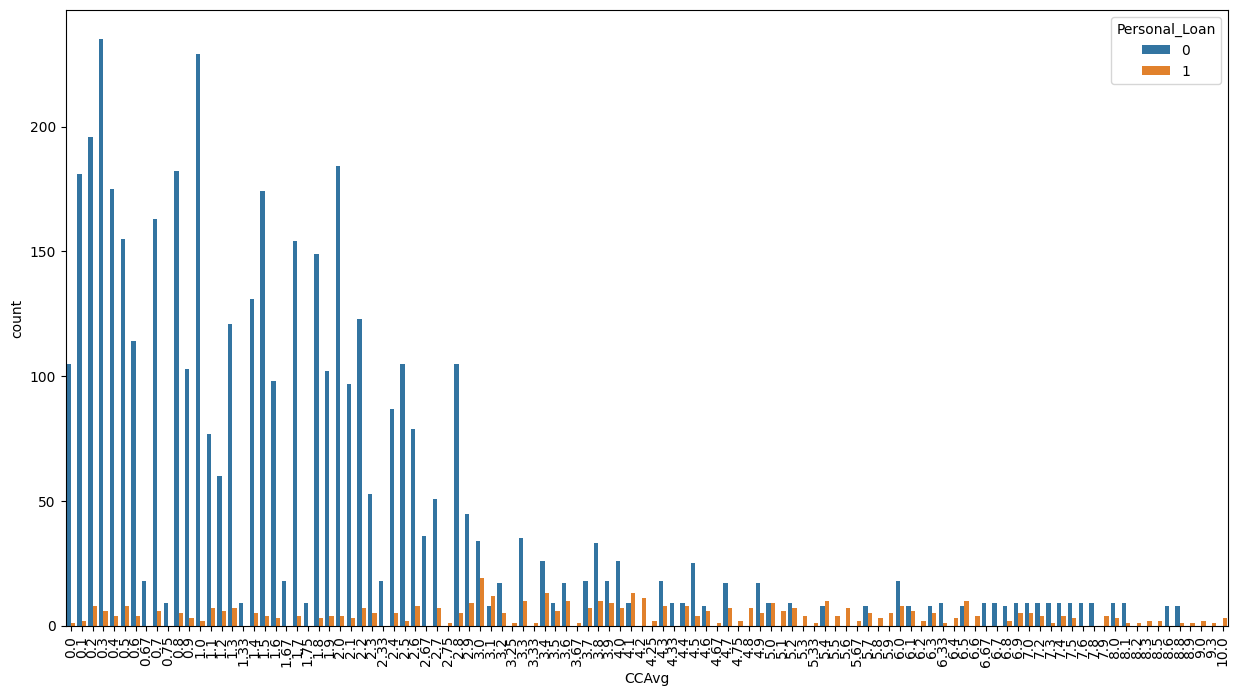

In [ ]:
plt.figure(figsize=(15, 8))
sns.countplot(data=data, x="CCAvg", hue="Personal_Loan");
plt.xticks(rotation=90);

**Create bins for CCAvg**<br>
To better understand the relationship between CCAvg and Personal Loan, let's create another plot for CCAvg Range.

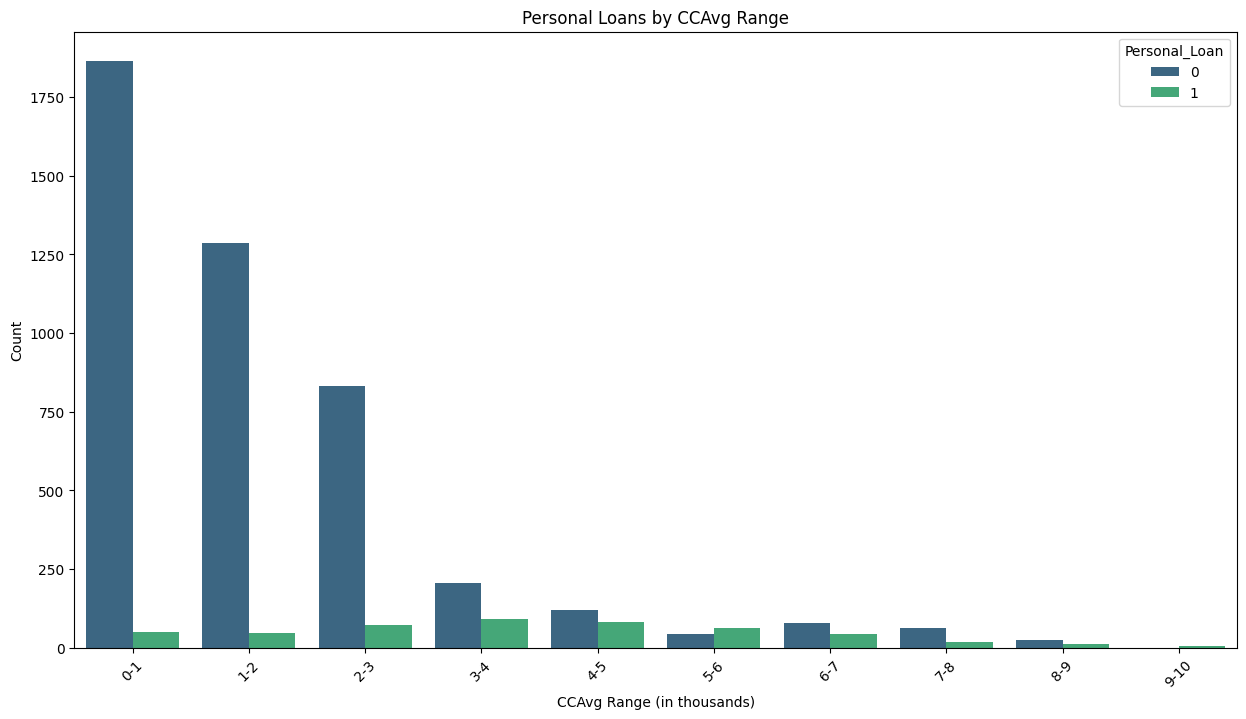

In [ ]:
# Define the bin edges
ccavg_bins = range(0, int(data2['CCAvg'].max()) + 1, 1)

# Create bin labels (optional)
ccavg_bin_labels = [f'{i}-{i+1}' for i in ccavg_bins[:-1]]

# create the binned column
data2['CCAvg_range'] = pd.cut(data2['CCAvg'], bins=ccavg_bins, labels=ccavg_bin_labels, include_lowest=True)

# Plotting the relationship between 'CCAvg_range' and 'Personal Loan'
plt.figure(figsize=(15, 8))
sns.countplot(x='CCAvg_range', hue='Personal_Loan', data=data2, palette='viridis')
plt.title('Personal Loans by CCAvg Range')
plt.xlabel('CCAvg Range (in thousands)')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# top 10 CCAvg for customers who accepted Personal Loan by home address
data2.query("Personal_Loan==1").groupby("CCAvg_range")['Personal_Loan'].count().nlargest(10)

,Personal_Loan
CCAvg_range,
3-4,92
4-5,83
2-3,71
5-6,62
0-1,49
1-2,47
6-7,43
7-8,19
8-9,10


In [ ]:
data2.groupby("CCAvg_range")['Personal_Loan'].value_counts(normalize=True)

CCAvg_range  Personal_Loan
0-1          0                0.974399
             1                0.025601
1-2          0                0.964741
             1                0.035259
2-3          0                0.921460
             1                0.078540
3-4          0                0.692308
             1                0.307692
4-5          0                0.593137
             1                0.406863
5-6          1                0.590476
             0                0.409524
6-7          0                0.641667
             1                0.358333
7-8          0                0.768293
             1                0.231707
8-9          0                0.714286
             1                0.285714
9-10         1                1.000000
             0                0.000000
Name: proportion, dtype: float64

#### Observations for CCAvg vs Personal Loan
* **Credit Card Average seems to have an impact on Personal Loan.**
* **Most customers who accepted Personal Loan had an average monthly credit card spend between 3 to 5 (in thousands).**
* Conversion Rate:
  - Highest conversion rate is for Credit average of **4-5 & 5-6 with 40%** each.
  - Customers with **6-7** Credit card average have a conversion rate of **35%**
  - Customers with **3-4** Credit card average have a conversion rate of **30%**
* Outliers in CCAvg doesn't seem have a major impact on the Personal Loan.




### Mortgage Vs Personal Loan

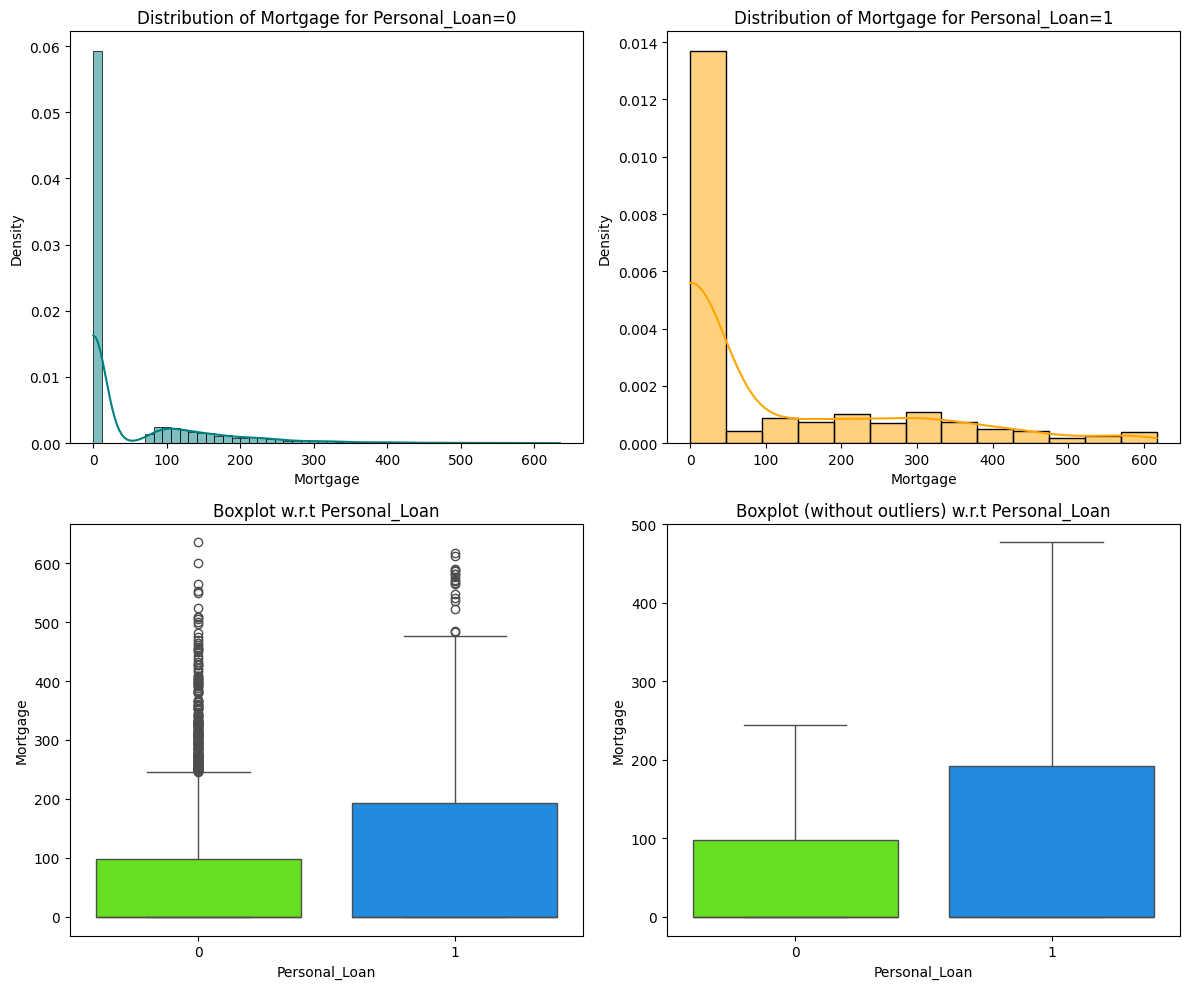

In [ ]:
#plot Mortgage vs Personal Loan
distribution_plot_wrt_target(data, "Mortgage", "Personal_Loan")

In [ ]:
#check how many personal Loans were accepted by customers with 0 mortgage
tot_accepted_personal_loan=data.query("Personal_Loan==1").shape[0]
print("Total Personal Loan Accepted: ",tot_accepted_personal_loan)

tot_accepted_mortgage_0=data.query("Personal_Loan==1 and Mortgage==0").shape[0]
print("Total Personal Loan Accepted by customers with 0 Mortgage:",tot_accepted_mortgage_0)

tot_accepted_mortgage_0_percent=tot_accepted_mortgage_0/tot_accepted_personal_loan*100
print("Percentage of Personal Loans accepted by customers with 0 Mortgage: "+str(tot_accepted_mortgage_0_percent)+'%')

Total Personal Loan Accepted:  480
Total Personal Loan Accepted by customers with 0 Mortgage: 312
Percentage of Personal Loans accepted by customers with 0 Mortgage: 65.0%


#### Observations for Mortgage Vs Personal Loan
* Mortgage is heavily skewed to the right for both the classes.
* **65% of Personal Loans were accepted by customers with 0 mortgage.**

### Securities_Account Vs Personal Loan

Personal_Loan          0    1   All
Securities_Account                 
All                 4520  480  5000
0                   4058  420  4478
1                    462   60   522
------------------------------------------------------------------------------------------------------------------------


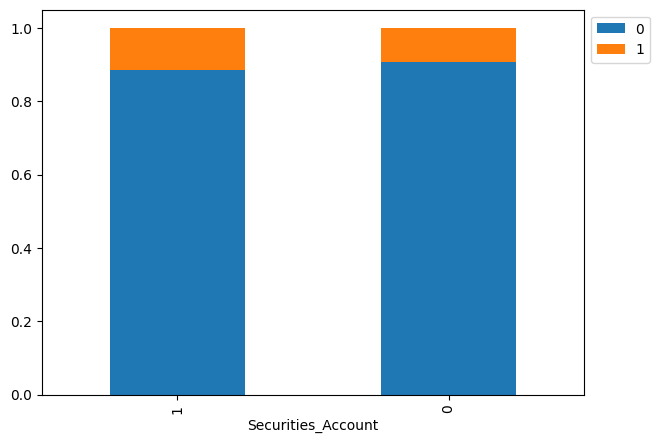

In [ ]:
#plot stacked barplot
stacked_barplot(data, "Securities_Account", "Personal_Loan")

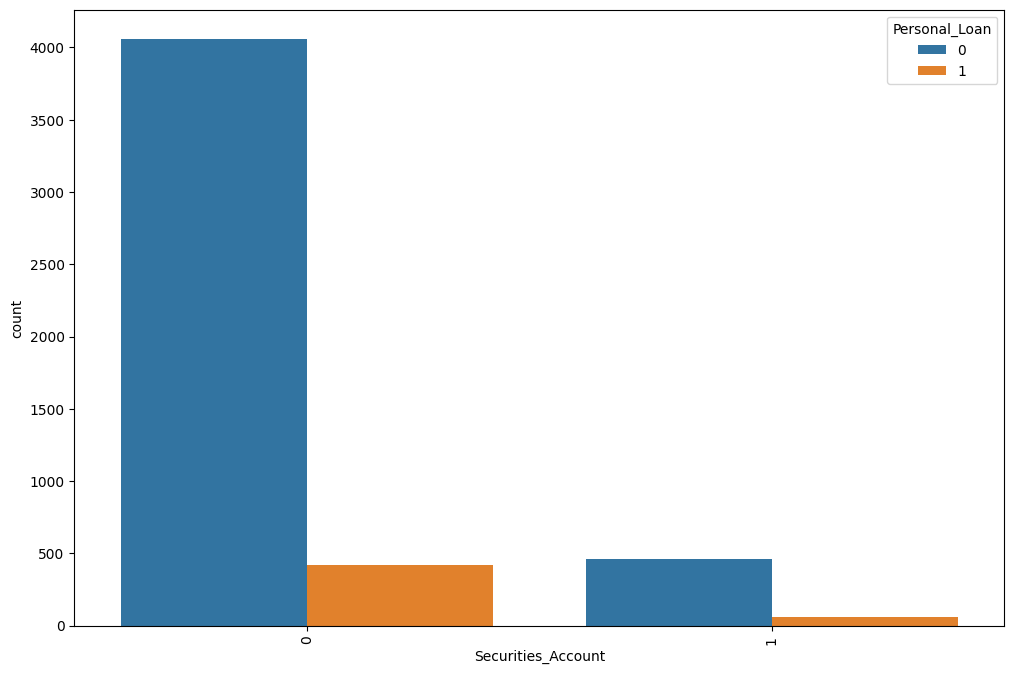

In [ ]:
plt.figure(figsize=(12, 8))
sns.countplot(data=data, x="Securities_Account", hue="Personal_Loan");
plt.xticks(rotation=90);

In [ ]:
#Securities Account vs Personal Loan
data.groupby('Securities_Account')['Personal_Loan'].value_counts(normalize=True)

Securities_Account  Personal_Loan
0                   0                0.906208
                    1                0.093792
1                   0                0.885057
                    1                0.114943
Name: proportion, dtype: float64

#### **Observations for Securities Account Vs Personal Loan**
* 9.3% of customers who did NOT have Securities Account with the bank, accepted the Personal Loan offer.
* 11.4% of customers who had Securities Account with the bank, accepted the Personal Loan offer.

### Credit Card Vs Personal Loan

Personal_Loan     0    1   All
CreditCard                    
All            4520  480  5000
0              3193  337  3530
1              1327  143  1470
------------------------------------------------------------------------------------------------------------------------


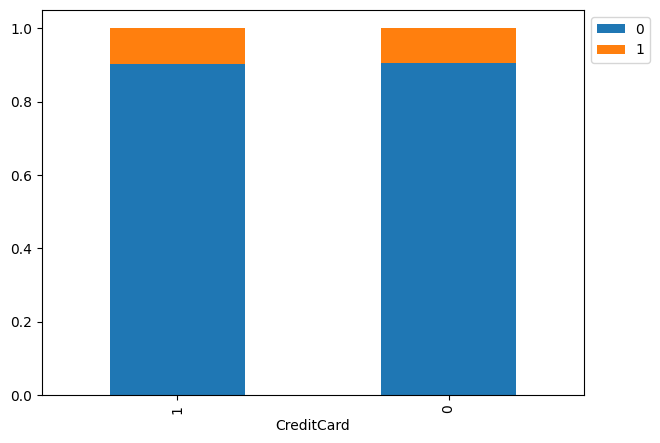

In [ ]:
stacked_barplot(data, "CreditCard", "Personal_Loan")

In [ ]:
#credit card vs personal loan
data.groupby('CreditCard')['Personal_Loan'].value_counts(normalize=True)

CreditCard  Personal_Loan
0           0                0.904533
            1                0.095467
1           0                0.902721
            1                0.097279
Name: proportion, dtype: float64

#### **Observations on Credit Card Vs Personal Loan**
* 9.5% of customers who didn't have credit cards from other banks, accepted Personal Loan offers as compared to 9.7% of customers who had credit cards from other banks.
* Credit Cards from other banks don't seem have a major impact on Personal Loan acceptance.

### Online vs Personal Loan

Personal_Loan     0    1   All
Online                        
All            4520  480  5000
1              2693  291  2984
0              1827  189  2016
------------------------------------------------------------------------------------------------------------------------


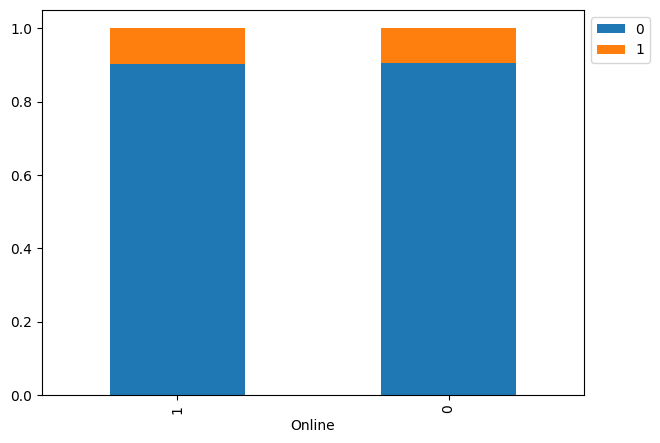

In [ ]:
stacked_barplot(data, "Online", "Personal_Loan")

In [ ]:
#check Online vs Personal Loan
data.groupby('Online')['Personal_Loan'].value_counts(normalize=True)

Online  Personal_Loan
0       0                0.90625
        1                0.09375
1       0                0.90248
        1                0.09752
Name: proportion, dtype: float64

#### **Observation on Online Vs Personal Loan**
* 9.3% of customers who didn't  use Internet Banking Facilities accepted Personal loan offer as compared to 9.7% of customers who use online.
* Usage of Internet Banking facilities doesn't have much impact on the Personal Loan acceptance rate.

### CD_Account vs Personal Loan

Personal_Loan     0    1   All
CD_Account                    
All            4520  480  5000
0              4358  340  4698
1               162  140   302
------------------------------------------------------------------------------------------------------------------------


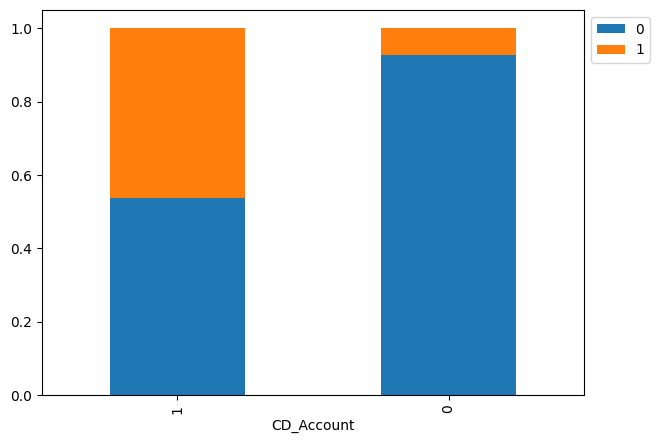

In [ ]:
stacked_barplot(data, "CD_Account", "Personal_Loan")

In [ ]:
#check CD Account vs Personal Loan
data.groupby('CD_Account')['Personal_Loan'].value_counts(normalize=True)

CD_Account  Personal_Loan
0           0                0.927629
            1                0.072371
1           0                0.536424
            1                0.463576
Name: proportion, dtype: float64

#### Observations on CD_Account Vs Personal Loan
* **CD_Account seems to have an impact on Personal loan acceptance.**
* **46% of customers who had a CD account with the bank, accepted a Personal Loan offer.**
* Only 7% of customers who didn't have a CD account with the bank, accepted a Personal Loan offer.

### Family Vs Personal Loan

Personal_Loan     0    1   All
Family                        
All            4520  480  5000
4              1088  134  1222
3               877  133  1010
1              1365  107  1472
2              1190  106  1296
------------------------------------------------------------------------------------------------------------------------


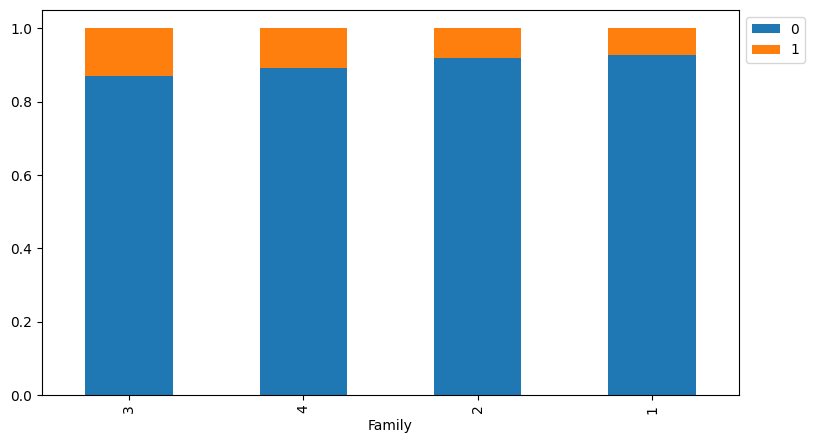

In [ ]:
#plot of family vs personal loan
stacked_barplot(data, "Family", "Personal_Loan")

In [ ]:
#check CD Account vs Personal Loan
data.groupby('Family')['Personal_Loan'].value_counts(normalize=True)

Family  Personal_Loan
1       0                0.927310
        1                0.072690
2       0                0.918210
        1                0.081790
3       0                0.868317
        1                0.131683
4       0                0.890344
        1                0.109656
Name: proportion, dtype: float64

#### **Observations on Family Vs Personal Loan**
* **Customers with family members of 3 have accepted the most Personal Loan Offers.**

### Hypothesis Testing - Chi Squared Test

Let's check the relationship between categorical variable and the target categorical variable.

In [ ]:
#function to calculate chi square

def chi_square_test(data, column1, column2, significance_level=0.05):
    """
    Performs a Chi-square test of independence between two categorical variables.
    """
    # Create a contingency table
    crosstab = pd.crosstab(data[column1], data[column2])

    # Define the hypotheses
    Ho = f"{column1} has NO effect on {column2}"
    Ha = f"{column1} has an effect on {column2}"

    # Perform Chi-square test
    chi, p_value, dof, expected = stats.chi2_contingency(crosstab)

    # Check the result and print the appropriate message
    if p_value < significance_level:  # Using the specified significance level
        print(f"{Ha} as the p_value ({p_value.round(3)}) < {significance_level}")
    else:
        print(f"{Ho} as the p_value ({p_value.round(3)}) > {significance_level}")


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Experience          5000 non-null   int64  
 2   Income              5000 non-null   int64  
 3   Family              5000 non-null   int64  
 4   CCAvg               5000 non-null   float64
 5   Education           5000 non-null   int64  
 6   Mortgage            5000 non-null   int64  
 7   Personal_Loan       5000 non-null   int64  
 8   Securities_Account  5000 non-null   int64  
 9   CD_Account          5000 non-null   int64  
 10  Online              5000 non-null   int64  
 11  CreditCard          5000 non-null   int64  
 12  City                4966 non-null   object 
dtypes: float64(1), int64(11), object(1)
memory usage: 507.9+ KB


In [ ]:
#chi squared test for Securities Account and Personal Loan
chi_square_test(data, 'Securities_Account', 'Personal_Loan')

Securities_Account has NO effect on Personal_Loan as the p_value (0.141) > 0.05


In [ ]:
#chi squared test for CD_Account and Personal Loan
chi_square_test(data, 'CD_Account', 'Personal_Loan')

CD_Account has an effect on Personal_Loan as the p_value (0.0) < 0.05


In [ ]:
# chi squared test for CreditCard and Personal Loan
chi_square_test(data, 'CreditCard', 'Personal_Loan')

CreditCard has NO effect on Personal_Loan as the p_value (0.884) > 0.05


In [ ]:
# chi squared for Online and Personal Loan
chi_square_test(data, 'Online', 'Personal_Loan')

Online has NO effect on Personal_Loan as the p_value (0.693) > 0.05


<a name="correlation"></a>
### **What are the attributes that have a strong correlation with the target attribute (personal loan)?**
* **Numerical Variables - Education, Income, CCAvg have strong correlation with the Personal Loan.**
  *   **Education:** Customers with Advanced/Professional Degree(3) have accepted the most Personal Loan Offers, followed by 2- Graduates and 1-Undergrad
  *   **Income:** As the income increases Personal Loan acceptance also increases then lowers at higher income ranges.Most Personal Loans were accepted by the customers in the salary range(in thousands) of **120-140** - 107
  * **CCAvg:** Most customers who accepted Personal Loan had an average monthly credit card spend between 3 to 5 (in thousands).


* **Categorical Variables - CD Account has an impact on the Personal Loan.**
  * **CD Account:** 46% of customers who had a CD account with the bank, accepted a Personal Loan offer. Hypothesis Testing (Chi-squared Test) showed that CD_Account has an effect on Personal_Loan as the p_value (0.0) < 0.05

<a name="data_preprocessing"></a>
## Data Preprocessing

* Missing value treatment
* Feature engineering (if needed)
* Outlier detection and treatment (if needed)
* Preparing data for modeling
* Any other preprocessing steps (if needed)

### Missing Values

In [ ]:
#checking for missing values
data.isnull().sum()

,0
Age,0
Experience,0
Income,0
Family,0
CCAvg,0
Education,0
Mortgage,0
Personal_Loan,0
Securities_Account,0
CD_Account,0


**Imputing missing values in City**<br>
* There are missing values in City. Let's impute that with Mode.

In [ ]:
#impute City with mode for City
data["City"].fillna(data["City"].mode()[0], inplace=True)

In [ ]:
data.City.isnull().sum()

0

There are no more missing values in the City.

### Outlier Detection

We will review outliers and treat those.

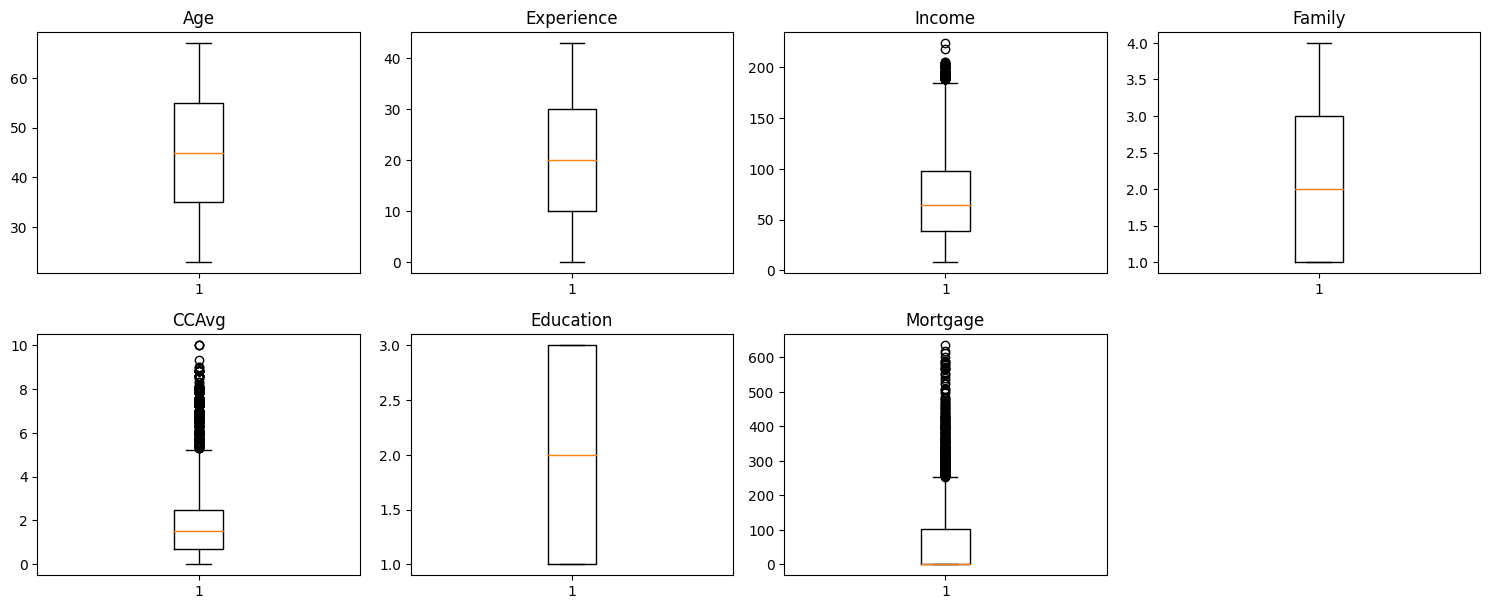

In [ ]:
# outlier detection using boxplot
num_cols = [
    "Age",
    "Experience",
    "Income",
    "Family",
    "CCAvg",
    "Education",
    "Mortgage"]  # List of numerical columns

plt.figure(figsize=(15, 12))

for i, variable in enumerate(num_cols):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

**Creating function to check for outlier percentage**

In [ ]:
# function to check for outlier
def check_outliers(data, feature):
  """function to check for outliers in feature"""
  Q1 = data[feature].quantile(0.25)
  Q3 = data[feature].quantile(0.75)

  IQR = Q3 - Q1                   #Inter Quantile Range (75th percentile - 25th percentile)
  lower_whisker = Q1 - 1.5*IQR    #Finding lower and upper bounds for all values. All values outside these bounds are outliers
  upper_whisker = Q3 + 1.5*IQR

  #calculate percentage of outliers
  print(f"Percentage of outliers in {feature}: ", round(((data[feature] < lower_whisker) | (data[feature] > upper_whisker)).sum()/data.shape[0]*100,2))

In [ ]:
#check outliers in CCAvg
check_outliers(data, "CCAvg")

Percentage of outliers in CCAvg:  6.48


In [ ]:
#check outliers in Mortgage
check_outliers(data, "Mortgage")

Percentage of outliers in Mortgage:  5.82


In [ ]:
#check outliers in CCAvg
check_outliers(data, "Income")

Percentage of outliers in Income:  1.92


**CCAvg, Income & Mortgage have outliers.**
  * CCAvg - 6.5% of outliers
  * Mortgage - 5.82 % of outliers
  * Income - 1.92 % of outliers

We will treat the outliers.

#### Treating Outliers

**Create function to treat outliers**

In [ ]:
#treat ouliers to cap at 95%

def treat_outliers(feature):
  """function to treat outliers in feature"""

  #check outliers before treating
  print("Before treating outliers:")
  check_outliers(data, feature)

  Q1 = data[feature].quantile(0.25) #Calculate Q1
  Q3 = data[feature].quantile(0.75) #Calculate Q2
  IQR = Q3 - Q1

  # Define outliers
  outliers = data[(data[feature] < Q1 - 1.5 * IQR) | (data[feature] > Q3 + 1.5 * IQR)]

  # Treating outliers cap at 95th percentile
  cap = data[feature].quantile(0.95)
  data[feature] = np.where(data[feature] > cap, cap, data[feature]) #cap at 95th percentile

  #check outliers after treating
  print("\nAfter treating outliers:")
  check_outliers(data, feature)


In [ ]:
#treat outliers in CCAvg
treat_outliers("CCAvg")

Before treating outliers:
Percentage of outliers in CCAvg:  6.48

After treating outliers:
Percentage of outliers in CCAvg:  6.48


In [ ]:
#treat outliers in Mortgage
treat_outliers("Mortgage")

Before treating outliers:
Percentage of outliers in Mortgage:  5.82

After treating outliers:
Percentage of outliers in Mortgage:  5.82


In [ ]:
#treat outliers in Income
treat_outliers("Income")

Before treating outliers:
Percentage of outliers in Income:  1.92

After treating outliers:
Percentage of outliers in Income:  0.0


**Results of outlier treatment**
* CCAvg & Mortgage had same outlier percentage before and after treating.
* **Income outliers reduced from 1.92 to 0.**

### Feature Selection

* **Drop ZIPCode:** Earlier we dropped ZIPCode and created City variable.
* **Drop CreditCard, Online, Securities_Account:** During EDA and Chi-Squared test, we found that CreditCard, Online & Securities_Account didn't have a major impact on Personal Loan (target variable), so we will drop these independent variables.

In [ ]:
#drop CreditCard, Online and Securities Account as these didn't have any impact on personal loan
data.drop(["CreditCard", "Online", "Securities_Account"], axis=1, inplace=True)

In [ ]:
#check columns
data.columns

Index(['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education',
       'Mortgage', 'Personal_Loan', 'CD_Account', 'City'],
      dtype='object')

**We see that CreditCard, Online & Securities_Account have been dropped.**

### Data Preparation for Modeling

#### Handle Highly Correlated variables

We earlier saw that Age and Experience had a high correlation. Let's check that again.

In [ ]:
#calculate correlation between age and experience
data.Age.corr(data.Experience)

0.9939907211052889

Age and Experience have a correlation of 0.99, so we can drop Experience.

In [ ]:
#drop Experience as it has high correlation with Age
data.drop("Experience", axis=1, inplace=True)

In [ ]:
data.columns

Index(['Age', 'Income', 'Family', 'CCAvg', 'Education', 'Mortgage',
       'Personal_Loan', 'CD_Account', 'City'],
      dtype='object')

We see that Experience has been dropped.

#### Convert Datatype

Let's see the structure of data to see if features have correct data types.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            5000 non-null   int64  
 1   Income         5000 non-null   float64
 2   Family         5000 non-null   int64  
 3   CCAvg          5000 non-null   float64
 4   Education      5000 non-null   int64  
 5   Mortgage       5000 non-null   float64
 6   Personal_Loan  5000 non-null   int64  
 7   CD_Account     5000 non-null   int64  
 8   City           5000 non-null   object 
dtypes: float64(3), int64(5), object(1)
memory usage: 351.7+ KB


In [ ]:
data.head()

,Age,Income,Family,CCAvg,Education,Mortgage,Personal_Loan,CD_Account,City
0,25,49.0,4,1.6,1,0.0,0,0,Pasadena
1,45,34.0,3,1.5,1,0.0,0,0,Los Angeles
2,39,11.0,1,1.0,1,0.0,0,0,Berkeley
3,35,100.0,1,2.7,2,0.0,0,0,San Francisco
4,35,45.0,4,1.0,2,0.0,0,0,Northridge


We notice that **Education, Personal_Loan & CD_Account are numerical data type but those are infact categorical in nature.** <br>

Let's change their data types to category.

In [ ]:
# change data type of Education, Personal_Loan, Securities_Account, CD_Account, Online, CreditCard to category
data["Education"] = data["Education"].astype("category")
data["Personal_Loan"] = data["Personal_Loan"].astype("category")
data["CD_Account"] = data["CD_Account"].astype("category")

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Age            5000 non-null   int64   
 1   Income         5000 non-null   float64 
 2   Family         5000 non-null   int64   
 3   CCAvg          5000 non-null   float64 
 4   Education      5000 non-null   category
 5   Mortgage       5000 non-null   float64 
 6   Personal_Loan  5000 non-null   category
 7   CD_Account     5000 non-null   category
 8   City           5000 non-null   object  
dtypes: category(3), float64(3), int64(2), object(1)
memory usage: 249.5+ KB


* Education, Personal_Loan,CD_Account have been converted to category data type.

#### Encode categorical variables
Let's hot encode City and Education

In [ ]:
#hot encode city & Education
data = pd.get_dummies(data, columns=["City","Education"], drop_first=True)

In [ ]:
data.head()

,Age,Income,Family,CCAvg,Mortgage,Personal_Loan,CD_Account,City_Alameda,City_Alamo,City_Albany,...,City_Weed,City_West Covina,City_West Sacramento,City_Westlake Village,City_Whittier,City_Woodland Hills,City_Yorba Linda,City_Yucaipa,Education_2,Education_3
0,25,49.0,4,1.6,0.0,0,0,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,45,34.0,3,1.5,0.0,0,0,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,39,11.0,1,1.0,0.0,0,0,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,35,100.0,1,2.7,0.0,0,0,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,35,45.0,4,1.0,0.0,0,0,False,False,False,...,False,False,False,False,False,False,False,False,True,False


#### Split into Train and Test

Our target variable is 'Personal Loan'. So we will define independent & dependent variable and split the data into train and test datasets.

In [ ]:
#Defining Independent and Dependent variables
X = data.drop(["Personal_Loan"], axis=1) #defining independent variables
Y = data["Personal_Loan"] #defining dependent variable

# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, stratify=Y, random_state=42
)

In [ ]:
#balance the dataset for personal loan
data.Personal_Loan.value_counts(normalize=True)


,proportion
Personal_Loan,
0,0.904
1,0.096


In [ ]:
data.columns #checking columns

Index(['Age', 'Income', 'Family', 'CCAvg', 'Mortgage', 'Personal_Loan',
       'CD_Account', 'City_Alameda', 'City_Alamo', 'City_Albany',
       ...
       'City_Weed', 'City_West Covina', 'City_West Sacramento',
       'City_Westlake Village', 'City_Whittier', 'City_Woodland Hills',
       'City_Yorba Linda', 'City_Yucaipa', 'Education_2', 'Education_3'],
      dtype='object', length=252)

In [ ]:
X.head()

,Age,Income,Family,CCAvg,Mortgage,CD_Account,City_Alameda,City_Alamo,City_Albany,City_Alhambra,...,City_Weed,City_West Covina,City_West Sacramento,City_Westlake Village,City_Whittier,City_Woodland Hills,City_Yorba Linda,City_Yucaipa,Education_2,Education_3
0,25,49.0,4,1.6,0.0,0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,45,34.0,3,1.5,0.0,0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,39,11.0,1,1.0,0.0,0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,35,100.0,1,2.7,0.0,0,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,35,45.0,4,1.0,0.0,0,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False


In [ ]:
#checking the shape of training and test set
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("\nPercentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("\nPercentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (3500, 251)
Shape of test set :  (1500, 251)

Percentage of classes in training set:
Personal_Loan
0    0.904
1    0.096
Name: proportion, dtype: float64

Percentage of classes in test set:
Personal_Loan
0    0.904
1    0.096
Name: proportion, dtype: float64


* 90% of observations belong to Class 0 (Did not accept Personal Loan) and ~10% observations belongs to class 1 (Accepter Personal Laon) and this is preserved in the train and test set.

<a name="model_building"></a>
## Model Building

### Model Evaluation Criterion

**Model can make wrong perdictions such as:**
* Predicting a customer will purchase the loan, when they won't. (FP)
* Predicting a customer will not purchase the loan, when they will.(FN)

**Which case is more Important?**


* If model predicts that a customer will buy a loan, but they wont't then we would have an inadequate use of resources.(FP)
* If model predicts that a customer will not buy a loan, but infact they would, then this is a loss of business for the bank (FN)
* **Company's goal is identify potential customers who will purchase the loan, so it is to reduce False Negative (FN).**


**How to get more eligible customers to purchase loan?**<br>
To lower FN, we need to **maximize Recall**, so will consider **Recall** as the performance criteria for our Decision Tree Performance.


### Model Building

**Function to Compute different performance metrics**

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

**Function to plot Confusion Matrix**

In [ ]:
def plot_confusion_matrix(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    # Predict the target values using the provided model and predictors
    y_pred = model.predict(predictors)

    # Compute the confusion matrix comparing the true target values with the predicted values
    cm = confusion_matrix(target, y_pred)

    # Create labels for each cell in the confusion matrix with both count and percentage
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)    # reshaping to a matrix

    # Set the figure size for the plot
    plt.figure(figsize=(6, 4))

    # Plot the confusion matrix as a heatmap with the labels
    sns.heatmap(cm, annot=labels, fmt="")

    # Add a label to the y-axis
    plt.ylabel(f"True label - {target.name}")

    # Add a label to the x-axis
    plt.xlabel(f"Predicted label- {target.name}")

    # Display the plot
    plt.show()

**Function to Create both Visual tree and Text Tree**

In [ ]:
#function to visualize Decision Tree
def visualize_tree(model):
    """
    Function to visualize the decision tree
    """
    # list of feature names in X_train
    feature_names = list(X_train.columns)

    # set the figure size for the plot
    plt.figure(figsize=(20, 20))

    # plotting the decision tree
    out = tree.plot_tree(
        model,                         # decision tree classifier model
        feature_names=feature_names,    # list of feature names (columns) in the dataset
        filled=True,                    # fill the nodes with colors based on class
        fontsize=9,                     # font size for the node text
        node_ids=False,                 # do not show the ID of each node
        class_names=None,               # whether or not to display class names
        )
    # add arrows to the decision tree splits if they are missing
    for o in out:
      arrow = o.arrow_patch
      if arrow is not None:
        arrow.set_edgecolor("black")    # set arrow color to black
        arrow.set_linewidth(1)          # set arrow linewidth to 1

    # displaying the plot
    plt.show()

    # printing a text report showing the rules of a decision tree
    print(
        tree.export_text(
        model,    # specify the model
        feature_names=feature_names,    # specify the feature names
        show_weights=True    # specify whether or not to show the weights associated with the model
        ))



**Function to check feature importance for the model**

In [ ]:
#function to check feature importance
def check_feature_importance(model,num_features,feature_names):
  """function to check top 10 feature importance"""
  #feature importance
  importances = model.feature_importances_

  # Get the indices of the features sorted by importance (ascending order)
  indices = np.argsort(importances)

  #get the importance in descending order
  indices_desc = indices[::-1]

  # print the top 10 feature importances in descending order
  print("Feature ranking:")
  for i in range(0,num_features+1):
    print(f"{i + 1}. Feature {indices_desc[i]} ({feature_names[indices_desc[i]]}): {importances[indices_desc[i]]}")

  # visualize the top n feature importances
  top_n = num_features
  top_indices = indices_desc[:top_n]

  # Plot the feature importances of the top 10 features
  plt.figure(figsize=(10, 6))
  plt.title(f"Top 10 Feature Importances")
  plt.barh(range(top_n), importances[top_indices], align="center")
  plt.yticks(range(top_n), [feature_names[i] for i in top_indices])
  plt.gca().invert_yaxis()
  plt.xlabel("Importance")
  plt.show()

<a name="dtree_default"></a>
### Decision Tree(Default)

* We had observed that 90% of observations belong to Class 0 (Didn't purchase personal loan) and ~10% observations belongs to class 1 (Purchased personal loan). **This is an imbalanced dataset.**
* Class 0 will dominate the decision tree and we should address this using a balanced class weight.

In [ ]:
#setting class weights
class_weights = {0: 1, 1: 3}

In [ ]:
# building model with default decision tree
model0 = DecisionTreeClassifier(random_state=42,class_weight=class_weights)
model0.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 1, 1: 3}, random_state=42)

####**Checking performance on Training set**

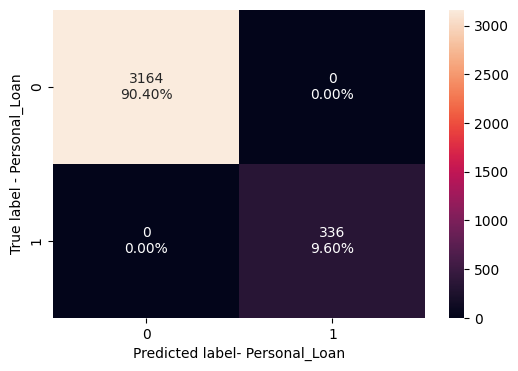

In [ ]:
# create confusion matrix
plot_confusion_matrix(model0, X_train, y_train)

Per confusion matrix - There are 0 False Positive and 0 False Negative, i.e model is fitting perfectly on training set.

In [ ]:
#check model performance metrics
model0_train_perf= model_performance_classification(
    model0, X_train, y_train
)
model0_train_perf

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


In [ ]:
#create classification report for train
print(classification_report(y_train, model0.predict(X_train)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3164
           1       1.00      1.00      1.00       336

    accuracy                           1.00      3500
   macro avg       1.00      1.00      1.00      3500
weighted avg       1.00      1.00      1.00      3500



* Default Decision Tree Model is able to perfectly classify all the data points in the Training set.

####**Checking performance on Test set**

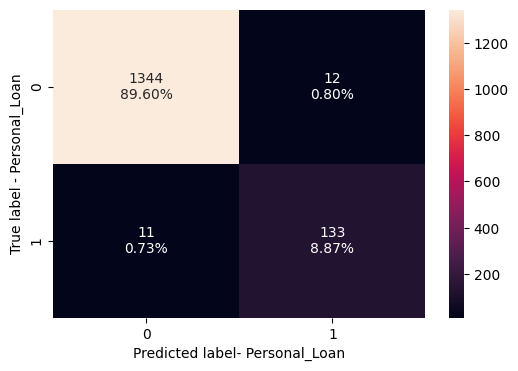

In [ ]:
#create confusion matrix
plot_confusion_matrix(model0, X_test, y_test)

In [ ]:
# check performance metrics
model0_test_perf = model_performance_classification(
    model0, X_test, y_test
)
model0_test_perf

,Accuracy,Recall,Precision,F1
0,0.984667,0.923611,0.917241,0.920415


In [ ]:
#create classification report for test
print(classification_report(y_test, model0.predict(X_test)))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1356
           1       0.92      0.92      0.92       144

    accuracy                           0.98      1500
   macro avg       0.95      0.96      0.96      1500
weighted avg       0.98      0.98      0.98      1500



**Compare performance of Training and Test set for Model 0 (Default Decision Tree)**

| Dataset | Accuracy | Recall | Precision | F1 Score |
|---------|----------|--------|-----------|----------|
| Train   | 1.0      | 1.0    | 1.0       | 1.0     |
| Test    | 0.98     | 0.92   | 0.91      | 0.92    |


* We observe that model performance on Train set is perfect and not very good on Test Data.
* Model is not generalizing well, we can say that **model is overfitting.**

#### Visualize Decision Tree

In [ ]:
#check features
feature_names = list(X_train.columns)

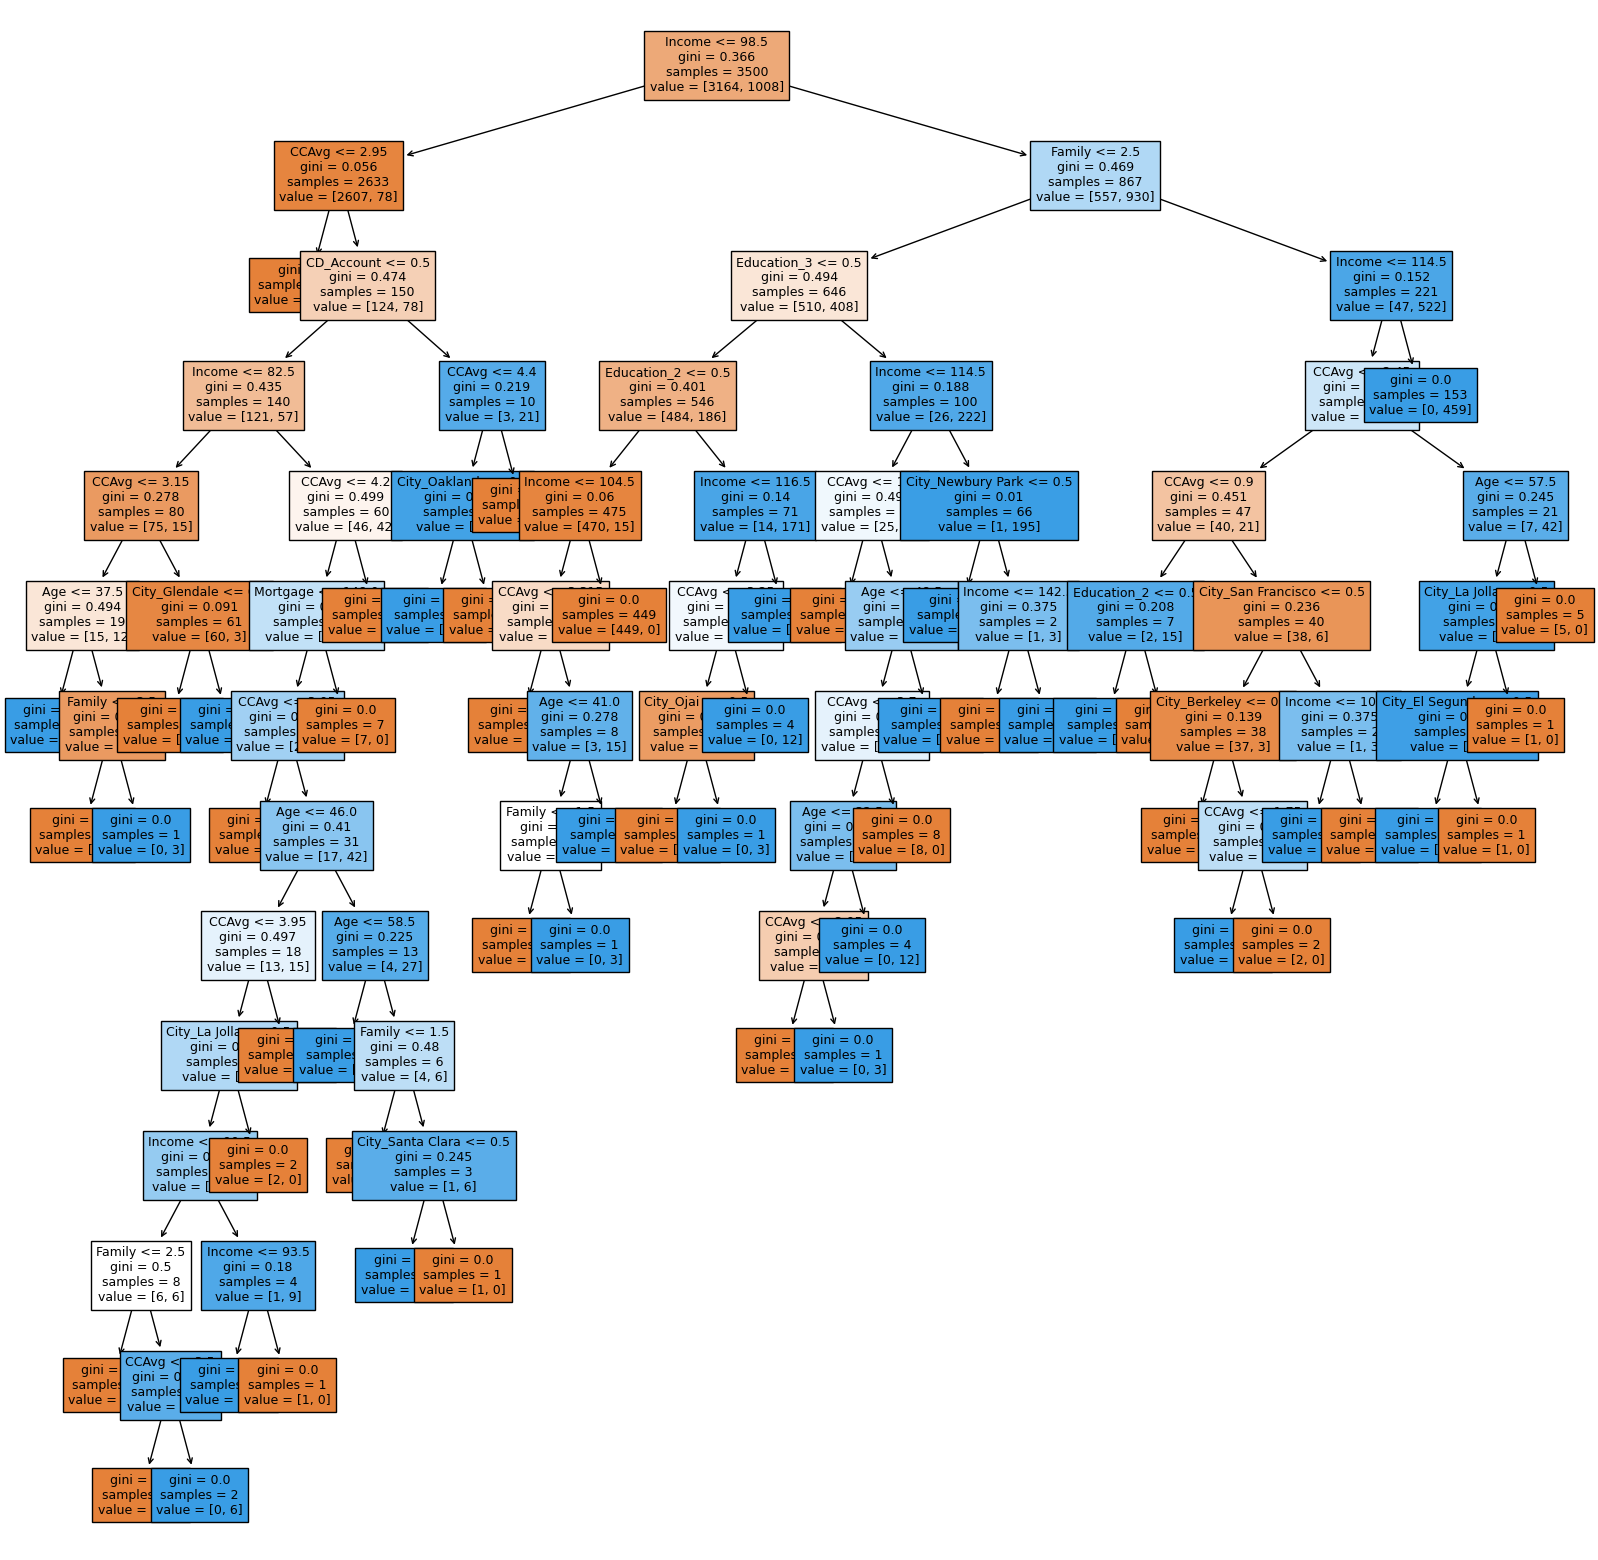

|--- Income <= 98.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [2483.00, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- CD_Account <= 0.50
|   |   |   |--- Income <= 82.50
|   |   |   |   |--- CCAvg <= 3.15
|   |   |   |   |   |--- Age <= 37.50
|   |   |   |   |   |   |--- weights: [0.00, 9.00] class: 1
|   |   |   |   |   |--- Age >  37.50
|   |   |   |   |   |   |--- Family <= 3.50
|   |   |   |   |   |   |   |--- weights: [15.00, 0.00] class: 0
|   |   |   |   |   |   |--- Family >  3.50
|   |   |   |   |   |   |   |--- weights: [0.00, 3.00] class: 1
|   |   |   |   |--- CCAvg >  3.15
|   |   |   |   |   |--- City_Glendale <= 0.50
|   |   |   |   |   |   |--- weights: [60.00, 0.00] class: 0
|   |   |   |   |   |--- City_Glendale >  0.50
|   |   |   |   |   |   |--- weights: [0.00, 3.00] class: 1
|   |   |   |--- Income >  82.50
|   |   |   |   |--- CCAvg <= 4.20
|   |   |   |   |   |--- Mortgage <= 148.00
|   |   |   |   |   |   |--- CCAvg <= 3.05
|   |   |   |   |   |   |   

In [ ]:
#visualize default decision tree & create text tree
visualize_tree(model0)

We can see that Default Decision tree is very complex and we need to make it simple by pre-pruning & post-pruning.

#### Check Feature Importance

Feature ranking:
1. Feature 1 (Income): 0.5035106109371247
2. Feature 249 (Education_2): 0.1421301010836969
3. Feature 2 (Family): 0.11283889076296143
4. Feature 3 (CCAvg): 0.10114231611665751
5. Feature 250 (Education_3): 0.09029723107227566
6. Feature 0 (Age): 0.020512222462727603
7. Feature 5 (CD_Account): 0.00851454355447405
8. Feature 79 (City_Glendale): 0.0037374831938675177
9. Feature 4 (Mortgage): 0.003554721581702608
10. Feature 145 (City_Ojai): 0.0032318237029324995
11. Feature 95 (City_La Jolla): 0.002334494821053269


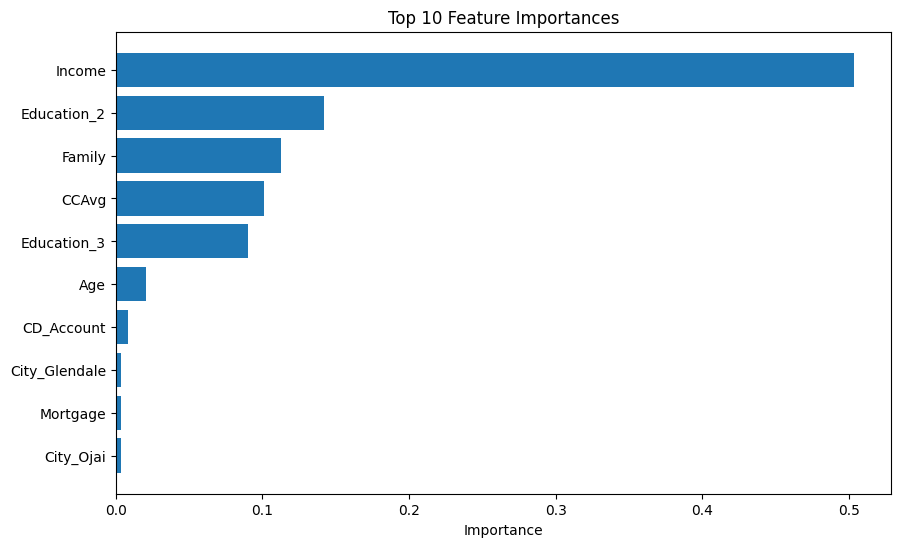

In [ ]:
#check top 10 feature importance of model0
check_feature_importance(model0,10,feature_names)

**Important Features for Default Decision Tree**
  1. Income
  2. Education_2
  3. Family
  4. CCAvg
  5. Education_3
  6. Age
  7. CD_Account
  8. City_Glendale
  9. Mortgage
  10. City_Ojai

### Model Performance Improvement

To improve performance of the tree we will prune it. We will test both pre-pruning and post-pruning and choose the best model.

<a name="dtree_prepruned"></a>
### Decision Tree (Pre-Pruning)

#### Pre-Pruning with Grid Search

**Hyperparmeter Tuning**<br>
We will find the best parameters for pre-pruning our tree. We will use GridSearchCV with `cv=7`.

In [ ]:
# Define the model
estimator = DecisionTreeClassifier(random_state=42,class_weight=class_weights)

# Define the parameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': np.arange(2, 11, 2),
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': np.arange(10,51,10),
    'max_features': [None, 'sqrt', 'log2'],
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator, param_grid=param_grid, cv=7, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Print the best parameters and the corresponding score
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: ", grid_search.best_score_)

# Evaluate the best model on the test set
best_model = grid_search.best_estimat or_
y_pred_test = best_model.predict(X_test)
y_pred_train=best_model.predict(X_train)

print("Train set recall: ",recall_score(y_train, y_pred_train)),
print("Test set recall: ", recall_score(y_test, y_pred_test))

y_pred_train = best_model.predict(X_train)
# print("Train F1 Score: ", f1_score(y_train, y_pred_train))


Fitting 7 folds for each of 900 candidates, totalling 6300 fits
Best parameters found:  {'criterion': 'entropy', 'max_depth': 8, 'max_features': None, 'min_samples_leaf': 10, 'min_samples_split': 2, 'splitter': 'best'}
Best cross-validation score:  0.9720000000000001
Train set recall:  0.9702380952380952
Test set recall:  0.9513888888888888


**Below are the best parameters based on Grid Search CV:**
* criterion : entropy
* max_depth: 8
* max_features: None
* min_samples_leaf: 10
* min_samples_split: 2
* splitter: best

Recall performance on Train: 0.97<br>
Recall performance on Test: 0.95

We will create the model with the best parameters

In [ ]:
#create model with the best parameters from Grid Search CV
model1=best_model
model1.fit(X_train,y_train) #fit model on the train

DecisionTreeClassifier(class_weight={0: 1, 1: 3}, criterion='entropy',
                       max_depth=8, min_samples_leaf=10, random_state=42)

#### Checking performance on Training Set

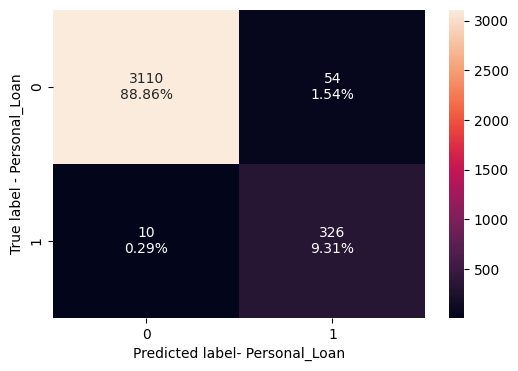

In [ ]:
# plot confusion matrix
plot_confusion_matrix(model1, X_train, y_train)

In [ ]:
#check performance for pre-pruned model
model1_train_perf = model_performance_classification(
    model1, X_train, y_train
)
model1_train_perf

,Accuracy,Recall,Precision,F1
0,0.981714,0.970238,0.857895,0.910615


In [ ]:
#classification report for training set
print(classification_report(y_train, model1.predict(X_train)))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      3164
           1       0.86      0.97      0.91       336

    accuracy                           0.98      3500
   macro avg       0.93      0.98      0.95      3500
weighted avg       0.98      0.98      0.98      3500



#### Checking performance on the Test Set

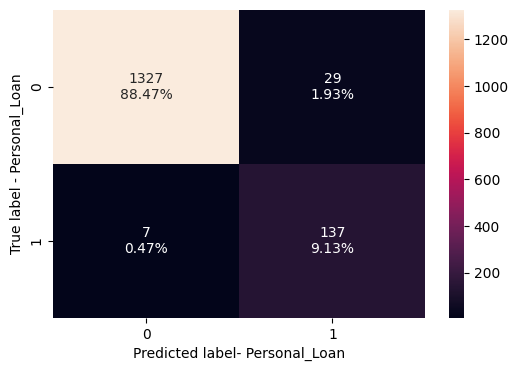

In [ ]:
plot_confusion_matrix(model1, X_test, y_test)

In [ ]:
#check performance metric on test
model1_test_perf = model_performance_classification(
    model1, X_test, y_test
)
model1_test_perf

,Accuracy,Recall,Precision,F1
0,0.976,0.951389,0.825301,0.883871


In [ ]:
#classification report on test set
print(classification_report(y_test, model1.predict(X_test)))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1356
           1       0.83      0.95      0.88       144

    accuracy                           0.98      1500
   macro avg       0.91      0.97      0.94      1500
weighted avg       0.98      0.98      0.98      1500



**Compare performance of Pre-Pruned Tree for both Training and Test**

| Dataset | Accuracy | Recall | Precision | F1 Score |
|---------|----------|--------|-----------|----------|
| Train   | 0.98     | 0.97   | 0.85      | 0.91     |
| Test    | 0.97     | 0.95   | 0.82      | 0.88     |


* **Recall on Training is 0.97**
* **Recall on Test is 0.95**
* **Pre-pruning model is generalizing well.**

Precision and F1 score are also in good range. We can say that model has good performance for maximizing recall which our goal.

#### Visualize Decision Tree

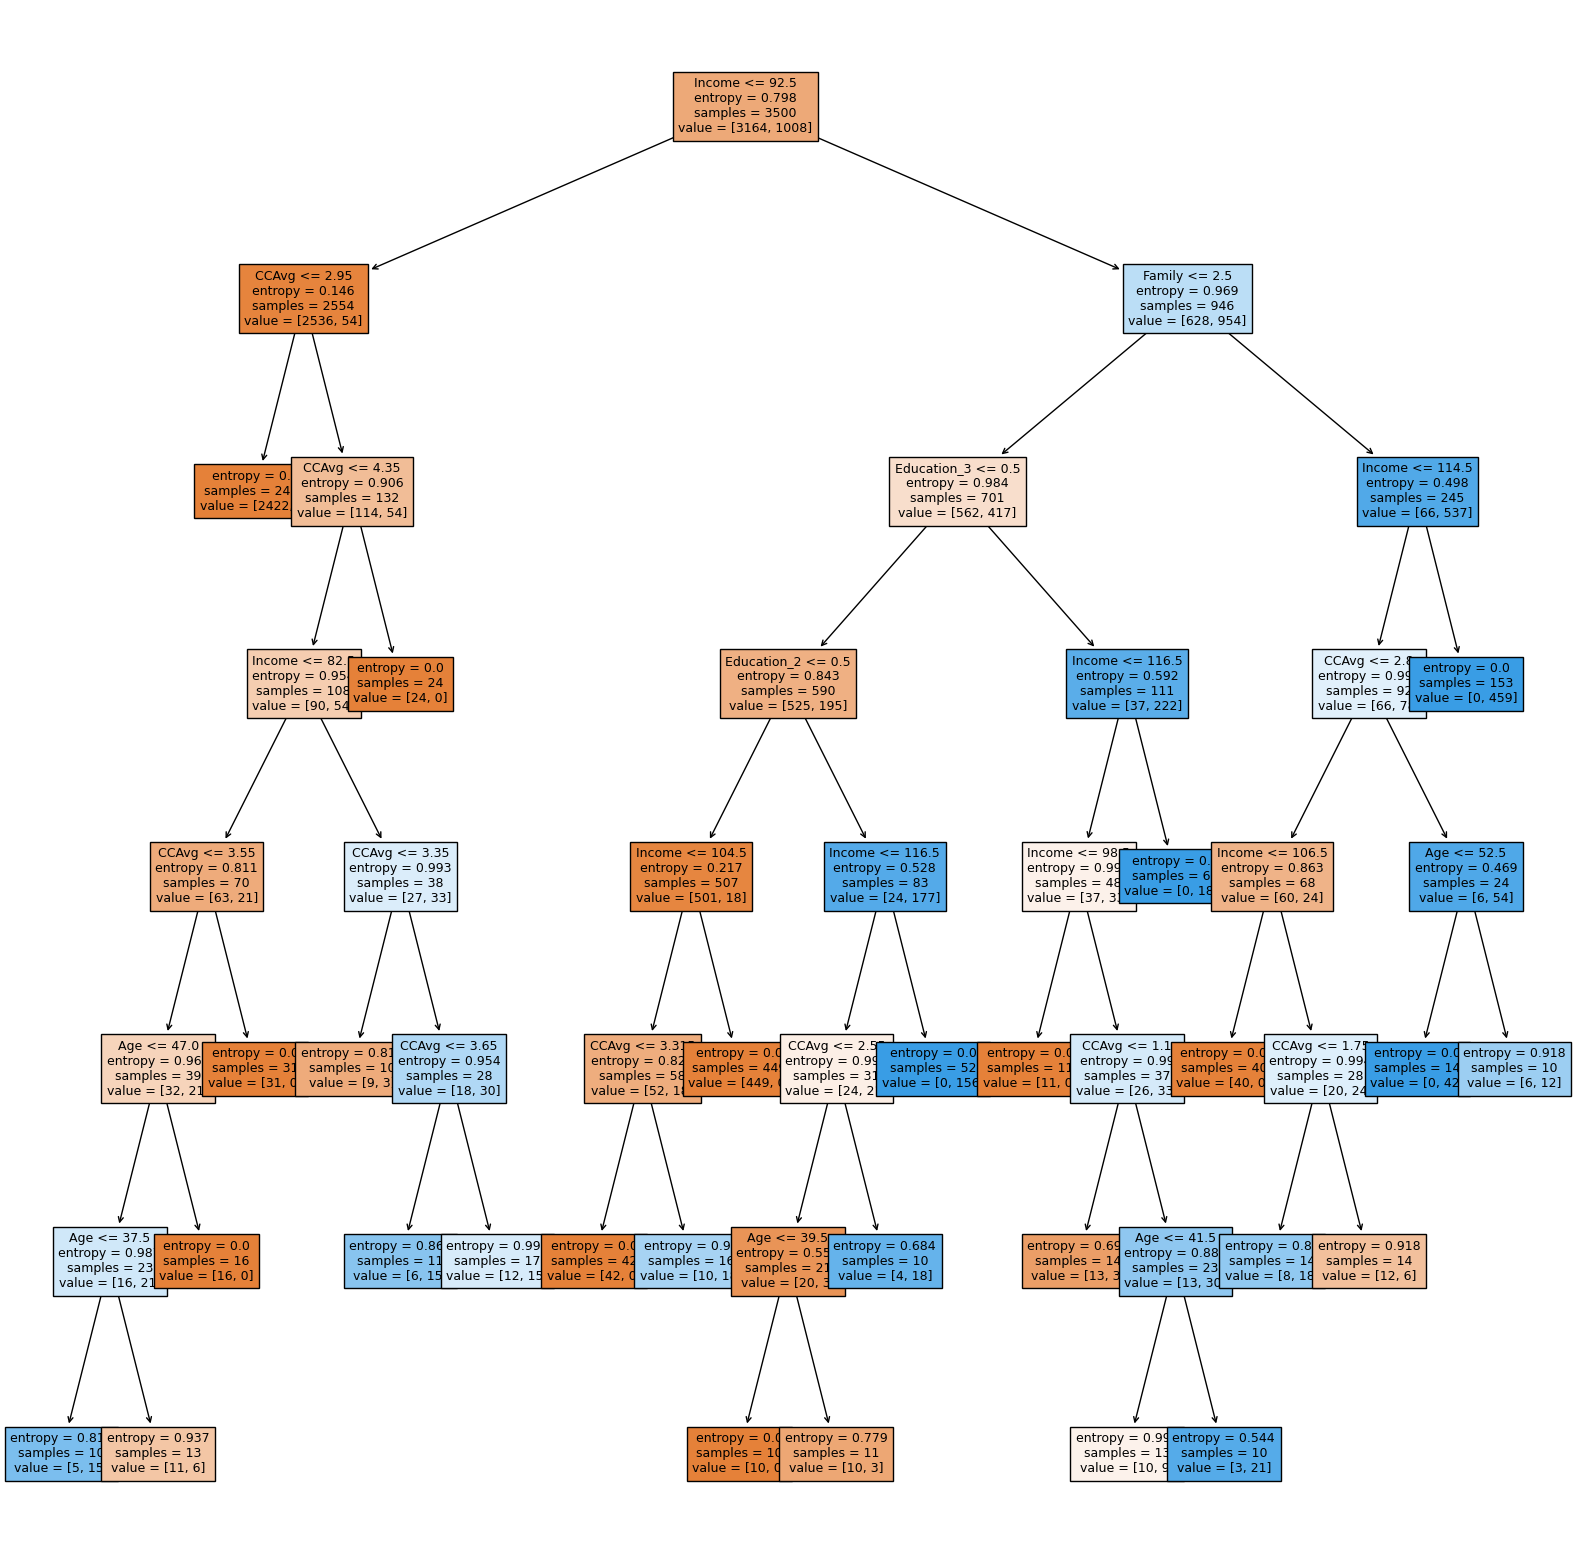

|--- Income <= 92.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [2422.00, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- CCAvg <= 4.35
|   |   |   |--- Income <= 82.50
|   |   |   |   |--- CCAvg <= 3.55
|   |   |   |   |   |--- Age <= 47.00
|   |   |   |   |   |   |--- Age <= 37.50
|   |   |   |   |   |   |   |--- weights: [5.00, 15.00] class: 1
|   |   |   |   |   |   |--- Age >  37.50
|   |   |   |   |   |   |   |--- weights: [11.00, 6.00] class: 0
|   |   |   |   |   |--- Age >  47.00
|   |   |   |   |   |   |--- weights: [16.00, 0.00] class: 0
|   |   |   |   |--- CCAvg >  3.55
|   |   |   |   |   |--- weights: [31.00, 0.00] class: 0
|   |   |   |--- Income >  82.50
|   |   |   |   |--- CCAvg <= 3.35
|   |   |   |   |   |--- weights: [9.00, 3.00] class: 0
|   |   |   |   |--- CCAvg >  3.35
|   |   |   |   |   |--- CCAvg <= 3.65
|   |   |   |   |   |   |--- weights: [6.00, 15.00] class: 1
|   |   |   |   |   |--- CCAvg >  3.65
|   |   |   |   |   |   |--- weights: [12.00, 15.0

In [ ]:
#visualize decision rules both visual and text
visualize_tree(model1)

* Visually we can see that pre-pruning has made the tree simpler. Let's check the feature importance for pre-pruned tree.

#### Check Feature Importance

Feature ranking:
1. Feature 1 (Income): 0.5899485278608977
2. Feature 249 (Education_2): 0.12550158114681034
3. Feature 3 (CCAvg): 0.11877496966320601
4. Feature 2 (Family): 0.087136933458021
5. Feature 250 (Education_3): 0.0658471278224866
6. Feature 0 (Age): 0.012790860048578361
7. Feature 244 (City_Westlake Village): 0.0
8. Feature 90 (City_Hopland): 0.0
9. Feature 88 (City_Highland): 0.0
10. Feature 87 (City_Hermosa Beach): 0.0
11. Feature 86 (City_Hayward): 0.0


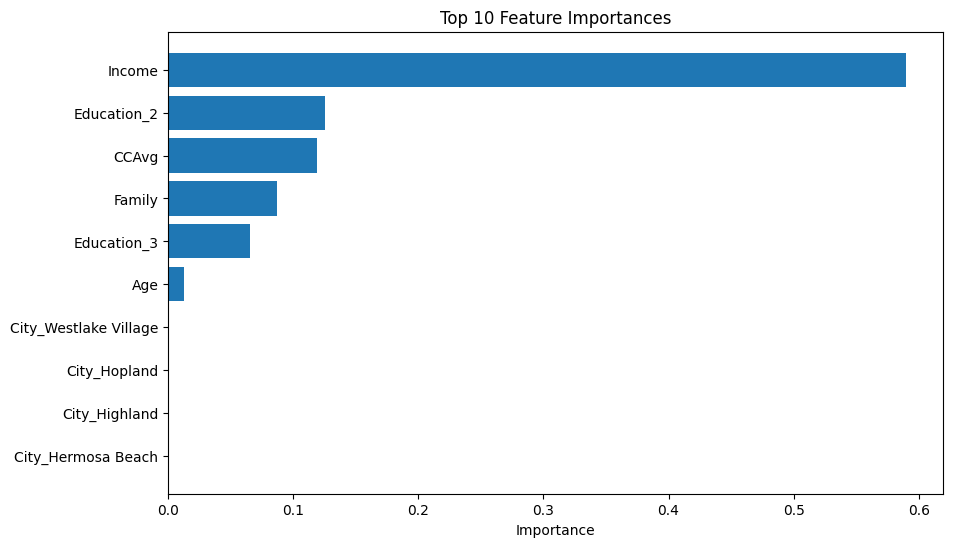

In [ ]:
#check feature importance
check_feature_importance(model1,10,feature_names)

**In the pre-pruned decision tree, important features are:**
  1. Income
  2. Education_2
  3. CCAvg
  4. Family
  5. Education_3
  6. Age

<a name="dtree_postpruned"></a>
### Decision Tree (Post Pruning)

Now we will post-prune the tree.

#### Cost Complexity Pruning

We will use cost_complexity_pruning_path to find effective_alphas and total leaf impurities.

In [ ]:
# Create an instance of the decision tree model
clf = DecisionTreeClassifier(random_state=42,class_weight=class_weights)

# Compute the cost complexity pruning path for the model using the training data
path = clf.cost_complexity_pruning_path(X_train, y_train)

# Extract the ccp_alphas values from the path
ccp_alphas, impurities = abs(path.ccp_alphas), path.impurities

In [ ]:
#show ccp_alphas and impurities
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.000000,0.000000
1,0.000238,0.000477
2,0.000360,0.000836
3,0.000411,0.001247
4,0.000411,0.001658
5,0.000431,0.002090
6,0.000458,0.002547
7,0.000458,0.003463
8,0.000575,0.004038
9,0.000599,0.005236


As alpha increases, there is an increase in total impurity of leaves due to tree pruning.

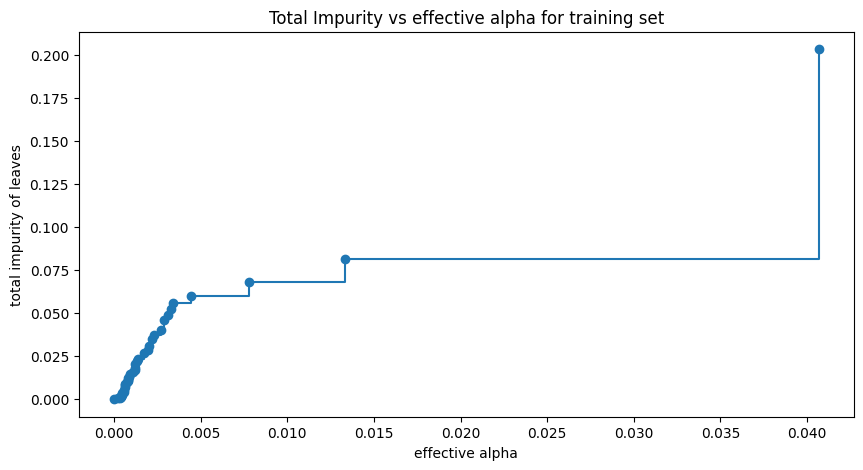

In [ ]:
#create figure
fig, ax = plt.subplots(figsize=(10, 5))

# Plot the total impurities versus effective alphas, excluding the last value,
# using markers at each data point and connecting them with steps
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")

ax.set_xlabel("effective alpha") #x-label
ax.set_ylabel("total impurity of leaves") #y-label
ax.set_title("Total Impurity vs effective alpha for training set") #title
plt.show()

Now we will train a decision tree using the effective alphas.

In [ ]:
clfs = [] #list to store decision trees

#for each ccp_alpha create a decision tree and fit on training data
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(
        random_state=42, ccp_alpha=ccp_alpha,class_weight=class_weights
    )
    #fit on training
    clf.fit(X_train, y_train)

    clfs.append(clf) #add to list

#print number of nodes in the last tree
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.1631654771428466


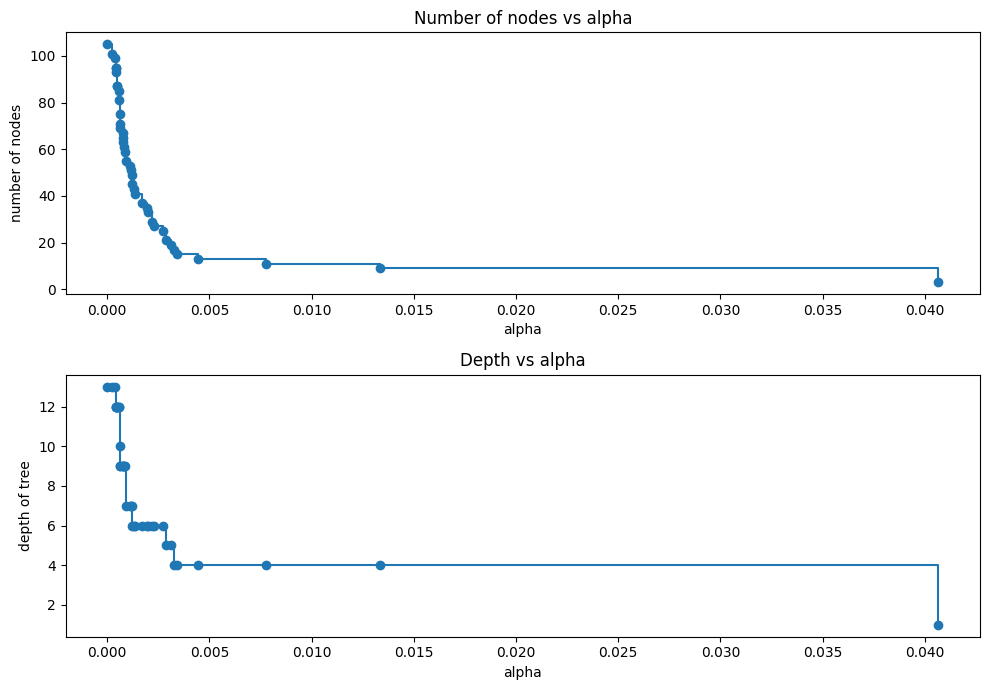

In [ ]:
#remove last classifier and corresponding ccp_alpha
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

#extract the number of nodes in each tree classifier
node_counts = [clf.tree_.node_count for clf in clfs]

#get maximum depth
depth = [clf.tree_.max_depth for clf in clfs]

#create a figure
fig, ax = plt.subplots(2, 1, figsize=(10, 7))

#plot number of nodes vs ccp_alphas
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")

#plot depth of tree Vs ccp_alphas
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

In [ ]:
recall_train = [] # list to store recall score for training

#check for decision tree in clfs
for clf in clfs:
    pred_train = clf.predict(X_train) #predict on train
    values_train = recall_score(y_train, pred_train) #calculate recall score
    recall_train.append(values_train) #add score to recall_train list

In [ ]:
recall_test = [] #list to store recall score for test

#check for decision tree in clfs
for clf in clfs:
    pred_test = clf.predict(X_test) #predict on train
    values_test = recall_score(y_test, pred_test) # calculate recall score
    recall_test.append(values_test) #add score to recall_test list

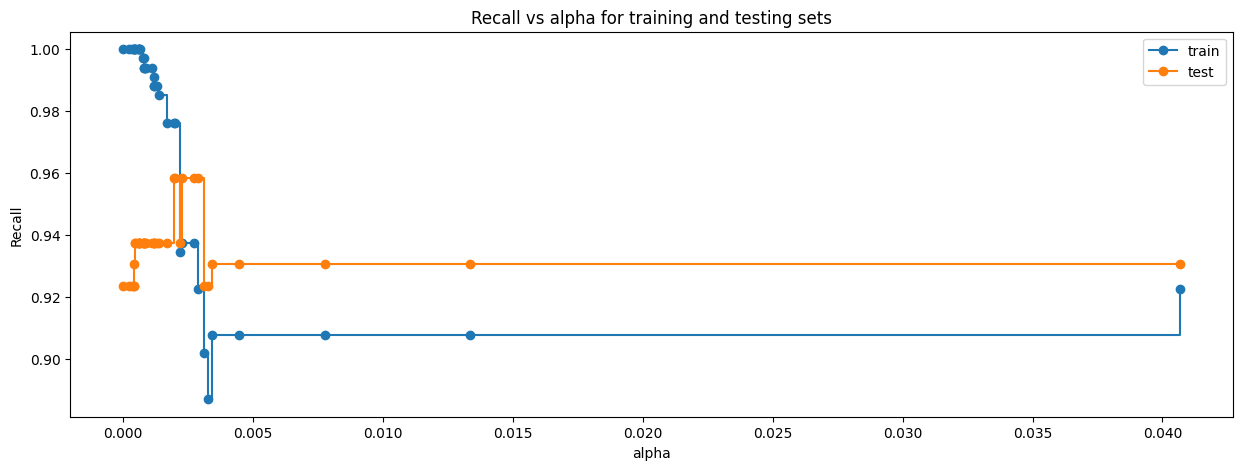

In [ ]:
# create plot for Recall vs alpha for both training and test sets
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")

#plot alpha vs recall score for training
ax.plot(ccp_alphas, recall_train, marker="o", label="train", drawstyle="steps-post",)

#plot alpha vs recall score for test
ax.plot(ccp_alphas, recall_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [ ]:
# creating the model where we get highest test recall
index_best_model = np.argmax(recall_test)

#select best model for the highest test recall score
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.0019611261221999477,
                       class_weight={0: 1, 1: 3}, random_state=42)


#### Check performance on Training set

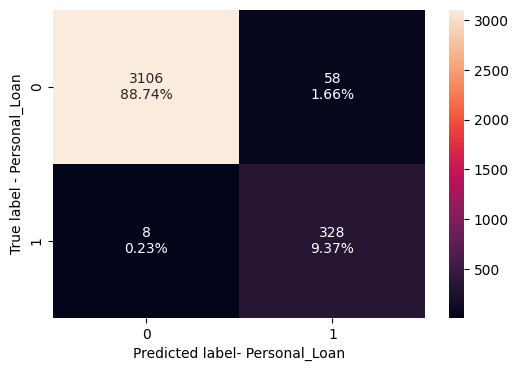

In [ ]:
# create model for post pruning
model2 = best_model

#plot confusion matrix
plot_confusion_matrix(model2, X_train, y_train)

In [ ]:
# check performance metric for training set
model2_train_perf = model_performance_classification(
    model2, X_train, y_train
)

#print performance scores
model2_train_perf

,Accuracy,Recall,Precision,F1
0,0.981143,0.97619,0.849741,0.908587


In [ ]:
#create classification report
print(classification_report(y_train, model2.predict(X_train)))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      3164
           1       0.85      0.98      0.91       336

    accuracy                           0.98      3500
   macro avg       0.92      0.98      0.95      3500
weighted avg       0.98      0.98      0.98      3500



#### Check performance on Test set

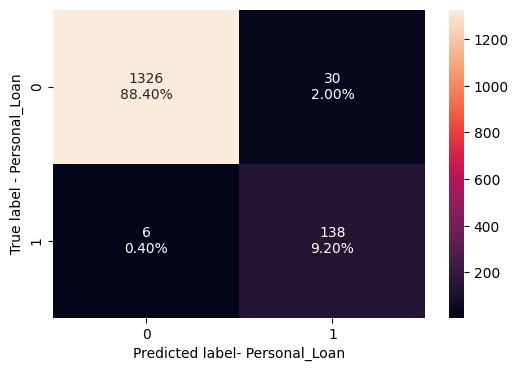

In [ ]:
plot_confusion_matrix(model2, X_test, y_test)

In [ ]:
model2_test_perf = model_performance_classification(
    model2, X_test, y_test
)
model2_test_perf

,Accuracy,Recall,Precision,F1
0,0.976,0.958333,0.821429,0.884615


In [ ]:
#create classification report
print(classification_report(y_test, model2.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1356
           1       0.82      0.96      0.88       144

    accuracy                           0.98      1500
   macro avg       0.91      0.97      0.94      1500
weighted avg       0.98      0.98      0.98      1500



**Compare performance on Training & Test for Post-pruned tree**

| Dataset | Accuracy | Recall | Precision | F1 Score |
|---------|----------|--------|-----------|----------|
| Train   | 0.98     | 0.97   | 0.84      | 0.90     |
| Test    | 0.97     | 0.95   | 0.82      | 0.88     |


* **Recall on Training set is 0.97**
* **Recall on Test set is 0.95**
* **Post pruned model seems to be generalizing well.** <br>
Precision and F1 score also in good range.

#### Visualize Decision Tree

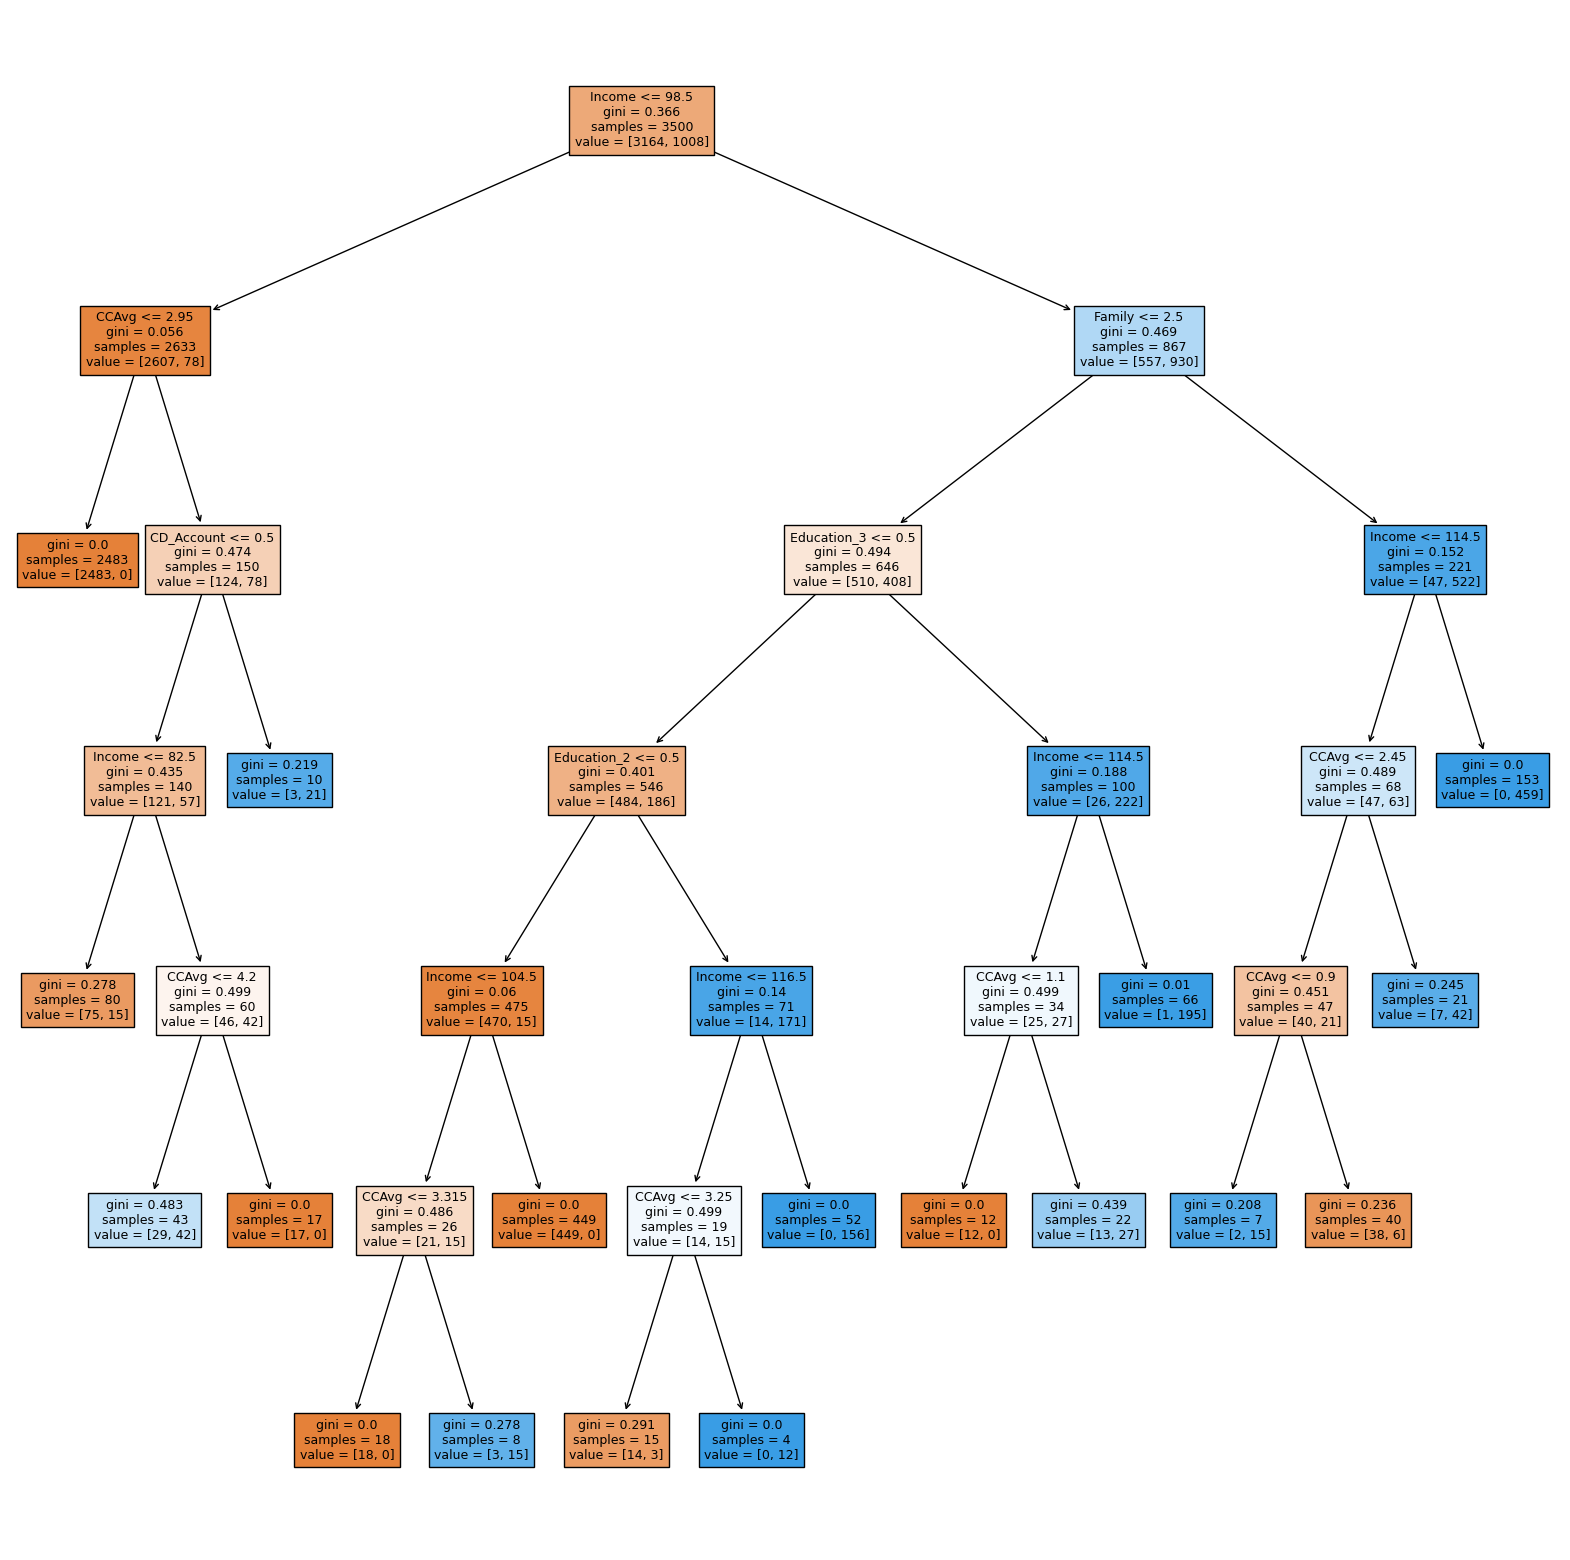

|--- Income <= 98.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [2483.00, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- CD_Account <= 0.50
|   |   |   |--- Income <= 82.50
|   |   |   |   |--- weights: [75.00, 15.00] class: 0
|   |   |   |--- Income >  82.50
|   |   |   |   |--- CCAvg <= 4.20
|   |   |   |   |   |--- weights: [29.00, 42.00] class: 1
|   |   |   |   |--- CCAvg >  4.20
|   |   |   |   |   |--- weights: [17.00, 0.00] class: 0
|   |   |--- CD_Account >  0.50
|   |   |   |--- weights: [3.00, 21.00] class: 1
|--- Income >  98.50
|   |--- Family <= 2.50
|   |   |--- Education_3 <= 0.50
|   |   |   |--- Education_2 <= 0.50
|   |   |   |   |--- Income <= 104.50
|   |   |   |   |   |--- CCAvg <= 3.31
|   |   |   |   |   |   |--- weights: [18.00, 0.00] class: 0
|   |   |   |   |   |--- CCAvg >  3.31
|   |   |   |   |   |   |--- weights: [3.00, 15.00] class: 1
|   |   |   |   |--- Income >  104.50
|   |   |   |   |   |--- weights: [449.00, 0.00] class: 0
|   |   |   |--- Ed

In [ ]:
#visualize Decision Tree
visualize_tree(model2)

Visually the decision tree is very simplified now with 6 features.

#### Check Feature Importance

Feature ranking:
1. Feature 1 (Income): 0.5417244745727985
2. Feature 249 (Education_2): 0.15172343349273945
3. Feature 2 (Family): 0.11153424194186215
4. Feature 250 (Education_3): 0.09798343379775869
5. Feature 3 (CCAvg): 0.08779510503567443
6. Feature 5 (CD_Account): 0.009239311159166815
7. Feature 80 (City_Glendora): 0.0
8. Feature 93 (City_Inglewood): 0.0
9. Feature 92 (City_Imperial): 0.0
10. Feature 91 (City_Huntington Beach): 0.0
11. Feature 90 (City_Hopland): 0.0


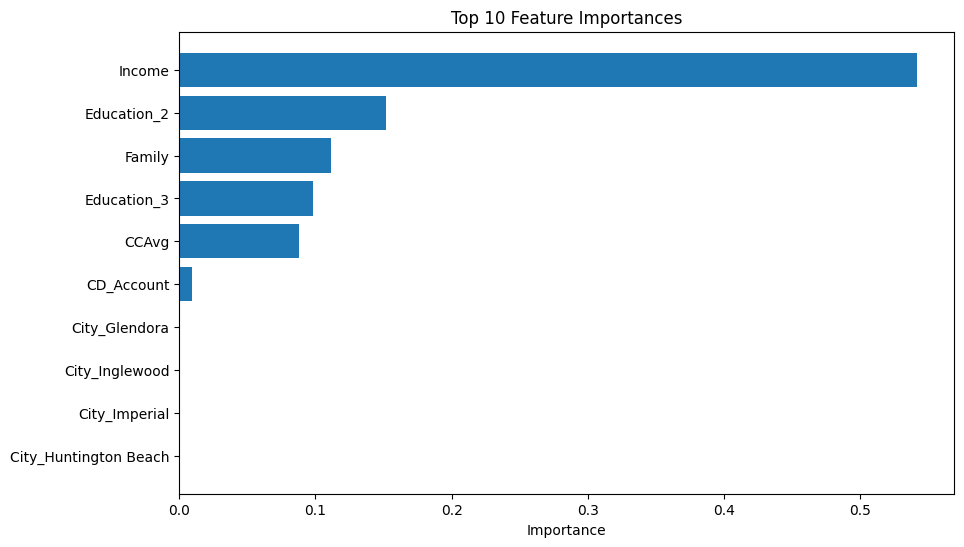

In [ ]:
#check feature importance
check_feature_importance(model2,10,feature_names)

**In post-pruned decision tree, important features are:**
1. Income
2. Education_2
3. Family
4. Education_3
5. CCAvg
6. CD_Account

<a name="final_model"></a>
## Model Comparison and Final Model Selection

Let's compare performance of all three models on both training and test sets.

In [ ]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        model0_train_perf.T,
        model1_train_perf.T,
        model2_train_perf.T
    ],
    axis=1,
)

models_train_comp_df.columns = [
    "Decision Tree (sklearn default)",
    "Decision Tree (Pre-Pruning with GridSearchCV)",
    "Decision Tree (Post-Pruning)"
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree (sklearn default),Decision Tree (Pre-Pruning with GridSearchCV),Decision Tree (Post-Pruning)
Accuracy,1.0,0.981714,0.981143
Recall,1.0,0.970238,0.976190
Precision,1.0,0.857895,0.849741
F1,1.0,0.910615,0.908587


In [ ]:
# training performance comparison

models_test_comp_df = pd.concat(
    [
        model0_test_perf.T,
        model1_test_perf.T,
        model2_test_perf.T
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree (sklearn default)",
    "Decision Tree (Pre-Pruning with GridSearchCV)",
    "Decision Tree (Post-Pruning)",
]
print("Test performance comparison:")
models_test_comp_df

Test performance comparison:


,Decision Tree (sklearn default),Decision Tree (Pre-Pruning with GridSearchCV),Decision Tree (Post-Pruning)
Accuracy,0.984667,0.976000,0.976000
Recall,0.923611,0.951389,0.958333
Precision,0.917241,0.825301,0.821429
F1,0.920415,0.883871,0.884615


* Both pre-pruned and post-pruned trees have generalized performance.

**Pre-pruned Decision Tree**
* Pre-pruned decision tree has 95% recall on test set as compared to 97% for Training, which can be considered good.
* Top features used by decision tree are Income, Education_2, CCAvg, Family, Education_3, Age.

**Post-Pruned Decision Tree**
* Post-pruned decision tree has a recall of 95% on test set as compare to 97% for training.
- Top features used by decision tree are Income, Education_2, Family, Education_3, CCAvg, CD_Account

**Final Model - Pre-Pruned Decision Tree(model1)**<br>
Performance of both pre-pruned and post-pruned is very similar. **We will choose the pre-pruned decision tree as our final model.**



### Predicting a single data point

In [ ]:
%%time
# choosing a data point
customer_details = X_test.iloc[24:25, :]

# making a prediction
personal_loan_acceptance_prediction = model1.predict(customer_details)

print(personal_loan_acceptance_prediction)

[1]
CPU times: user 4.26 ms, sys: 1.05 ms, total: 5.31 ms
Wall time: 6.15 ms


* For the selected dataset, model predicted 1 i.e. the customer will most likely accept the personal loan offer.
* Model was able to predict that very fast.

In [ ]:
#printing customer details for the selected data point
customer_details

,Age,Income,Family,CCAvg,Mortgage,CD_Account,City_Alameda,City_Alamo,City_Albany,City_Alhambra,...,City_Weed,City_West Covina,City_West Sacramento,City_Westlake Village,City_Whittier,City_Woodland Hills,City_Yorba Linda,City_Yucaipa,Education_2,Education_3
575,54,93.0,1,2.7,0.0,0,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False


In [ ]:
# making a prediction
acceptance_likelihood = model1.predict_proba(customer_details)
print(acceptance_likelihood[0, 1])

0.8181818181818182


* This shows that model is 81% confident that the customer will accept the personal loan offer.

<a name="recommendations"></a>
## Actionable Insights and Business Recommendations


### What recommedations would you suggest to the bank?

### Model Recommendations

* **Use pre-pruned decision tree model** to predict the customers who are most likely to accept the personal loan offers.
* Create specific marketing campaigns based on observations and recommendations shared below.

### Which customer attributes are more significant in driving purchases?

**Based on the EDA & important features for our final model, below are the attributes that are more significant in driving purchases:**
  1. Income
  2. Education_2
  3. CCAvg
  4. Family
  5. Education_3
  6. Age

Feature ranking:
1. Feature 1 (Income): 0.5899485278608977
2. Feature 249 (Education_2): 0.12550158114681034
3. Feature 3 (CCAvg): 0.11877496966320601
4. Feature 2 (Family): 0.087136933458021
5. Feature 250 (Education_3): 0.0658471278224866
6. Feature 0 (Age): 0.012790860048578361
7. Feature 244 (City_Westlake Village): 0.0
8. Feature 90 (City_Hopland): 0.0
9. Feature 88 (City_Highland): 0.0
10. Feature 87 (City_Hermosa Beach): 0.0
11. Feature 86 (City_Hayward): 0.0


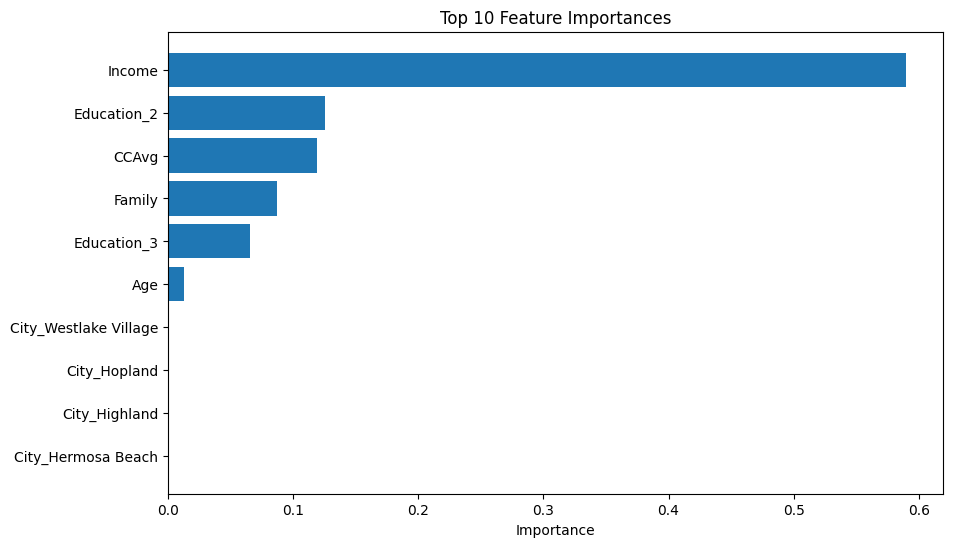

In [ ]:
#see feature importance of our final model
check_feature_importance(model1,10,feature_names)

### Which segments of customers to target more?

* **Target High-Income Customers**
  - EDA showed that there is a high correlation between Income and Personal loans and most loans were accepted by customers with salary range of 120-140k and 160-180k.
  - Income was the most important feature in both pre-pruned and post-pruned model.
  - Marketing messaging should focus on **highlighting benefits of personal loans** for high income customers.

* **Focus on customers with Credit Card Average between 3-7k**
  - Conversion rate was highest among customers with credit card average of 3- 7k with the best conversion of 40% from 4-6k.
  - **Offer incentives** for customers to convert their credit card spending into a personal loan, such as **lower interest rate or cash back rewards** for using the loan to pay off credit card balances.
  - CCAvg was one the top features in pre-pruned decision tree.

* **Target Highly Educated customers**
  - EDA showed that highly educated customers with Advanced/Professional degrees or Bachelor degree are most likely to accept personal loan.
  - Both Education level of 2 and 3 were identified as important features in pre-pruned and post-pruned decision tree.
  - Create campaign that resonate with this group, showcasing **how personal loan can help them with professional or personal goals**.

* **Encourage customers to open CD Accounts & reach out to existing CD account holders**
  - 46% of CD account holders have accepted a personal loan offer. This means that customers with CD account are more open to accept personal loan offers.
  - **Consider creating bundled offers** e.g. personal loan with special rate for CD account holders. Create messaging to bring their attention to savings.
  - 94% of customers don't have a CD account with the bank. Given that customers with CD account have  higher chances of buying a personal loan, **encourage customers to open a CD account with the bank.**

* **Consider Family Size especially family with 3 or 4 members**
  - Customers with family members 3 or 4 have higher chances of accepting personal loan offers as they might personal loan for family-related expenses.
  - **Highlight benefits** of personal loan for solution for family needs such as **education, healthcare or home renovations.**
  - Family was the 2nd most important feature in post-pruned decision tree.

* **Age Targeting**
  - EDA showed that customers in age group 30-60 accepted the most personal loan offers.
  - Create **age-specific offers** to meet the needs for different age groups.
  - Age was also highlighted as the 6th important feature in pre-pruned decision tree.

* **Review Cities with High Conversions**
  - Most personal loans were accepted by customers residing in Los Angeles, followed by Berkeley, San Diego, San Francisco and Palo Alto. A few of the cities had higher than average conversion rates.
  - Add more marketing resources to focus on cities with higher conversion.



**Target Profile of a customer who has highest probability of purchasing loan could be defined as:**
* Income range 120 - 180k
* Credit Card average between 3 - 5k
* Education Level - Graduate or Advanced/Professional
* Family 3 or 4
* Age 30-50
* Has a CD account with the bank
* Lives in any of these cities - Los Angeles  Berkeley, San Diego, San Francisco, Palo Alto

___